In [1]:
import graphlab as gl

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
musicdata = "./dataset/amazon5core/digitalmusic/digitalmusic5core.csv"
healthdata = "./dataset/amazon5core/healthcare/10ksample.csv"

# loading data using gl
musicsf = gl.SFrame.read_csv(musicdata, delimiter=",",
                             usecols=["asin","reviewerID","overall","reviewText"],
                             column_type_hints=[str, str, int, str])

# healthsf = gl.SFrame.read_csv(healthdata, delimiter=",",
#                               usecols=["asin","reviewerID","overall","reviewText"],
#                               column_type_hints=[str, str, int, str])

This non-commercial license of GraphLab Create for academic use is assigned to rahulbali.mecse16@pec.edu.in and will expire on November 23, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\cramdog\AppData\Local\Temp\graphlab_server_1531824219.log.0


Read 45080 lines. Lines per second: 27768.1

Finished parsing file E:\ACADEMICS\PEC---\ME 4 SEM\code\graph-code\dataset\amazon5core\digitalmusic\digitalmusic5core.csv

Parsing completed. Parsed 64706 lines in 1.80761 secs.

In [4]:
# divide the review and rating data
ratings = musicsf[["asin", "reviewerID", "overall"]]
reviews = musicsf[["asin", "reviewerID", "reviewText"]]


# ratings = healthsf[["asin", "reviewerID", "overall"]]
# reviews = healthsf[["asin", "reviewerID", "reviewText"]]

# train, test = gl.recommender.util.random_split_by_user(dataset=ratings,item_id="asin",user_id="reviewerID",max_num_users=100)

## cross validation structure
folds = gl.cross_validation.KFold(ratings, 10)
train, test = folds[3]


In [5]:
# train.show()
# gl.canvas.show()

In [6]:
## using recommender system lsa or svd

# outF = open("cross_val_score.txt", "w")

## random seed 22 is good.
shuffletrain = gl.cross_validation.shuffle(train, random_seed=22)

# for train, valid in folds:
model = gl.recommender.factorization_recommender.create(observation_data=train,
                                                        user_id="reviewerID",
                                                        item_id="asin",
                                                        target="overall",
                                                        num_factors=50, 
                                                        nmf=0, max_iterations=300,
                                                        solver='sgd',
                                                        verbose=1)
    
# print >> outF, model['coefficients']
# # view = model.views.overview(validation_set=)
# print >> outF, model.evaluate_precision_recall(dataset=valid)
# print >> outF, model.evaluate_rmse(valid, target='overall')
# print >> outF, "balibalibalibalibalibalibbalibbalibbalibalibali"

# out_rmse = model.evaluate_rmse(dataset=test, target='overall')
out_pr = model.evaluate_precision_recall(dataset=test, verbose=1)
print(out_pr.viewkeys())
print(out_pr['precision_recall_by_user'])
print(out_pr['precision_recall_overall']['recall'].sum())
# model.show()


# outF.close()

Recsys training: model = factorization_recommender

Preparing data set.

Data has 58235 observations with 5541 users and 3568 items.

Data prepared in: 0.206189s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 50       |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 300      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 58235 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | 0.106459                                 |

| 4       | 0.195312          | 0.276853                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.390625          | 0.106459                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.17842           | 1.08555               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 251.228ms    | DIVERGED          | DIVERGED              | 0.390625    |

| RESET   | 319.29ms     | 1.17842           | 1.08555               |             |

| 1       | 498.453ms    | 1.36791           | 1.16951               | 0.195312    |

| 2       | 643.584ms    | DIVERGED          | DIVERGED              | 0.116134    |

| RESET   | 719.655ms    | 1.17845           | 1.08557               |             |

| 1       | 812.738ms    | 0.916383          | 0.957272              | 0.0580668   |

| 2       | 946.86ms     | 0.724937          | 0.851429              | 0.0345267   |

| 3       | 1.05s        | 0.679564          | 0.824356              | 0.0254734   |

| 4       | 1.09s        | 0.660457          | 0.812684              | 0.0205297   |

| 5       | 1.21s        | 0.648498          | 0.805294              | 0.017366    |

| 7       | 1.49s        | 0.635958          | 0.79747               | 0.0134929   |

| 10      | 1.80s        | 0.624837          | 0.790466              | 0.0103259   |

| 17      | 2.51s        | 0.597906          | 0.773243              | 0.00693571  |

| 27      | 3.45s        | 0.562114          | 0.74974               | 0.00490235  |

| 37      | 4.43s        | 0.52186           | 0.722395              | 0.00387058  |

| 47      | 5.23s        | 0.481707          | 0.694045              | 0.00323485  |

| 50      | 5.50s        | 0.469517          | 0.685205              | 0.00308816  |

| 57      | 6.04s        | 0.441108          | 0.66415               | 0.00279912  |

| 67      | 6.91s        | 0.402142          | 0.634133              | 0.00247954  |

| 77      | 7.70s        | 0.366442          | 0.605326              | 0.00223388  |

| 87      | 8.56s        | 0.334136          | 0.578022              | 0.00203839  |

| 97      | 9.42s        | 0.305084          | 0.552317              | 0.00187866  |

| 100     | 9.67s        | 0.296969          | 0.54492               | 0.00183623  |

| 107     | 10.22s       | 0.279063          | 0.528232              | 0.00174538  |

| 117     | 11.03s       | 0.255815          | 0.505744              | 0.00163226  |

| 127     | 11.77s       | 0.235046          | 0.484773              | 0.00153488  |

| 137     | 12.55s       | 0.216495          | 0.465242              | 0.00145006  |

| 147     | 13.31s       | 0.19991           | 0.447059              | 0.00137543  |

| 157     | 14.15s       | 0.185055          | 0.430121              | 0.00130919  |

| 167     | 14.96s       | 0.171718          | 0.414323              | 0.00124994  |

| 177     | 15.68s       | 0.159708          | 0.399563              | 0.0011966   |

| 187     | 16.45s       | 0.148864          | 0.385752              | 0.00114828  |

| 197     | 17.26s       | 0.139046          | 0.372806              | 0.00110428  |

| 207     | 18.04s       | 0.130134          | 0.360652              | 0.00106402  |

| 217     | 18.79s       | 0.122025          | 0.349226              | 0.00102703  |

| 227     | 19.50s       | 0.114631          | 0.33847               | 0.000992906 |

| 237     | 20.22s       | 0.107874          | 0.328334              | 0.000961316 |

| 247     | 20.98s       | 0.101688          | 0.318772              | 0.000931976 |

| 257     | 21.75s       | 0.0960126         | 0.30974               | 0.000904644 |

| 267     | 22.49s       | 0.090797          | 0.3012                | 0.000879112 |

| 277     | 23.40s       | 0.0859943         | 0.293116              | 0.0008552   |

| 287     | 24.20s       | 0.081564          | 0.285456              | 0.000832753 |

| 297     | 24.88s       | 0.0774696         | 0.27819               | 0.000811634 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.0755837

Final training RMSE: 0.274778

recommendations finished on 1000/3242 queries. users per second: 12334.4

recommendations finished on 2000/3242 queries. users per second: 10299.9

recommendations finished on 3000/3242 queries. users per second: 10229.7

dict_keys(['precision_recall_overall', 'precision_recall_by_user'])
+----------------+--------+-----------+--------+-------+
|   reviewerID   | cutoff | precision | recall | count |
+----------------+--------+-----------+--------+-------+
| A103KNDW8GN92L |   1    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   2    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   3    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   4    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   5    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   6    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   7    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   8    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   9    |    0.0    |  0.0   |   2   |
| A103KNDW8GN92L |   10   |    0.0    |  0.0   |   2   |
+----------------+--------+-----------+--------+-------+
[58356 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more

In [7]:
# params = dict([('target', 'overall'),('observation_data', 'train'),('user_id', "reviewerID"),('item_id', "asin"),('target', "overall"),
#                                                 ('num_factors', 10),('solver', 'als'),('verbose', '1')])

# def evaluator1(model, train, valid):
#     targets = valid['overall']
#     return graphlab.evaluation.f1_score(targets, predictions,average = 'micro')

# job = gl.cross_validation.cross_val_score(folds,gl.recommender.factorization_recommender.create,params, evaluator=evaluator1)
# # # print >> outF, job.get_results()

# print(job.get_results())
# outF.close()

In [8]:
# recs = model.recommend(users=["AFNCXMCX7VZWH"])

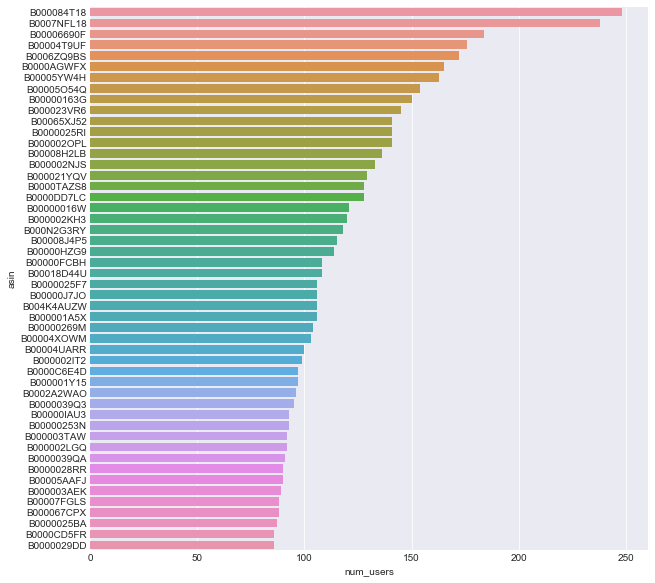

In [13]:
# coeff = model['coefficients']['reviewerID']['factors']

# python method list
methods = [method_name for method_name in dir(model) if callable(getattr(model, method_name))]
# print(coeff)

# print(model.summary)

userPitem = model.get_num_users_per_item()
itemPuser = model.get_num_items_per_user()

userPitem = userPitem.to_dataframe()
itemPuser = itemPuser.to_dataframe()

# itemPuser = itemPuser.sort_values("num_items", ascending=False, kind='mergesort')
userPitem = userPitem.sort_values("num_users", ascending=False, kind='mergesort')
# print(itemPuser)

# sb.barplot(userPitem['asin'], userPitem['num_users']) #Variable Plot

plt.figure(figsize=(10,10))
# sb.barplot(y='reviewerID', x='num_items', data=itemPuser.head(50))

# userPitem.head(50)

sb.set_style('darkgrid')
sb.barplot(y='asin', x='num_users', data=userPitem.head(50))

In [9]:
# using topic modelling

textdata1 = reviews['reviewText']

# texttrain, texttest = train_test_split(textdata1, test_size = 0.2)
# reviewfolds = gl.cross_validation.KFold(textdata1, 10)
# texttrain, texttest = reviewfolds[1]

review_docs = gl.text_analytics.count_words(textdata1)
review_docs = review_docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)

texttrain, texttest = gl.text_analytics.random_split(review_docs, prob=0.4)

# review_test = gl.text_analytics.count_words(texttest)
# review_test = review_docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)

# gl.text_analytics.trim_rare_words()

# texttrainframe = texttrain.to_dataframe()

# series = texttrainframe.iloc[:,0]
# listseries = []
# for i in series:
#     listseries.append(i)
    
# listseries
    
# # series2 = gl.SArray(listseries, dtype=dict)
# type(texttrainframe)


# texttrain = series2.to_dict()
# texttrain = series2.to_dict()



lda = gl.topic_model.create(dataset=texttrain, validation_set=texttest, num_topics=100, num_iterations=200, verbose=1)

lda.


Learning a topic model

Number of documents     64706

Vocabulary size    366316

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 23.69s        | 2.38389e+006   | 16452.1         |

topic 0: album original &amp; song title fans single collection music. great full set includes worth include

topic 1: buy songs gza collection. wu-tang rza method brandy highly fan made production buckley's liquid iron

topic 2: music great musical high albums it. recording enjoy feel rest sing creative give are: here,

topic 3: album good album, big long can't 3 make "the hot things listening features top lyrics

topic 4: song good don't album. heard hear time song. that's kind it. feel big me. didn't

topic 5: songs it's i'm love i've that's time perfect big give simon stone work fan long

topic 6: sounds can't bad find gonna voice listen record singing add tracks lips heard guess make

topic 7: album words dance blood record straight band wanna mr. record. beats lot soulful variety pick

topic 8: it's don't great album. love i'm albums sound buy back favorite one. real heard that's

topic 9: cd 2 tracks long stars live reviews 1 fans couple star me, 3 hear punk

topic 10: cd album buy album, record material voice, made big run well, solo good sweet song

topic 11: music musical time bit sounds good early tracks disc joni world played release that's time.

topic 12: songs back album. purchased sound favorite r&b best. front hasn't love school i've day loved

topic 13: record years solo stand carly enjoy nice big songs, it's debut simon high interesting girl

topic 14: music it's it. track title don't radio lot world makes years country listen hit strong

topic 15: - good beat -- game track 2 great nice production beats (f/ rap nas he's

topic 16: make found rock buy born release releases dont made solid live interested real sound start

topic 17: &quot;the hear beats heard bad say, &quot;you &quot;i funky set long mike mary gems pick

topic 18: music i'm worth found artist 5 stop collection. disc deep loves cd. mr. one. i've

topic 19: songs album rock phil don't album. collection country fan collins you're good eagles dance make

topic 20: blues love rock time playing moody title sacd can't &quot;the enjoyed stars lot songs blues.

topic 21: cd time album. it, prince hate sound. i'm carl 70's she's high them. debut stars

topic 22: cd good 2 rap beats 4 hip da hop production ja 5 rule stars rhymes

topic 23: cd album - heard don't song high jay-z cd, alison listened review however, style 10

topic 24: album can't put back favorite single black soul kind coast west me, mike live make

topic 25: rock love classic i'm long brings isn't hard kind guys jazz found fire bands stuff

topic 26: white jack great stripes fan it. stuff bought play meg black hear dance pick feat

topic 27: great " r&b , track ( an' can't nice true cd. worth ) music. collection.

topic 28: cd music dont real lyrics beats classic words matter thought 10 doesn't solid dope didnt

topic 29: sound group hot put production makes wasn't miss classic ! music. don't out. duffy day

topic 30: lyrics music favorite steely album's perfect turn pure simon sound didn't you. hit can't simon's

topic 31: cd years songs alicia release can't music keys classic give good lp album, amy ballads

topic 32: cd tunes guy artists highly pure kids i've alot talent today admit moment left jam

topic 33: great listen pop you're 3 cd. band tunes that's amazing pretty beautiful track start live

topic 34: tracks music album make feel track listen listening put classic i've music. i'm fans that's

topic 35: songs song albums classic don't hit &quot; give enjoy part things greatest it. favorite it,

topic 36: sound listen soul sounds easy album years remember collection. amazing hit knew stop long interpol

topic 37: it's voice title long sounds dance remember group good tracks world pop, earth dire idea

topic 38: hard time music guy real check rock it's you've great work i'm james album. songs,

topic 39: - album music & track sounds guitar vocal vocals sound work piano pop -- makes

topic 40: i'm music pop people buy made lyrics kelly fun huge music, r. jackson left top

topic 41: songs cd good song great it. worth make heard listening favorite voice listen live sarah

topic 42: music pop nelly don't makes furtado listening it, musical words fans amazing gave isn't times

topic 43: fan heard guru & gang he's cd check sounds work bit production mr. guy stays

topic 44: voice cyndi reviews lauper wanna grace blues song. jimmy nickel cyndi's vocals ever. fan past

topic 45: cd cd. it's heard made &amp; songs makes she's disc lyrics don't big &quot;the dance

topic 46: love big outkast , rest real andre i'm singing voice back country boi songs, style

topic 47: songs . love buy listening true hit songs, fans check sell albums hits johnny recorded

topic 48: time love songs can't cd lyrics album. release 2 disc track life find 4 loved

topic 49: songs van time long band david halen alanis lot lee albums eddie music songs, interesting

topic 50: it's song pretty voice heard album, record there's isn't great title beautiful song. find here,

topic 51: song it's track good song, favorite tracks song. featuring chorus eminem catchy bit lot makes

topic 52: hip hop great songs listen don't buy you're time. thing i've sound straight life thought

topic 53: great sound i'm people listen it. music. vocals disc song. music, amazing jazz heard singing

topic 54: song listen lyrics songs, listening made long time. life songs. give work i've they're music.

topic 55: tori cat tori's amos put stevens albums marshall eminem time music. lyrics long mathers found

topic 56: make buy recommend great voice la band dark one. material late music, excellent playing bad

topic 57: classic cd tracks tunes favorites &amp; personal &quot;i bon artist playing musical title high jovi

topic 58: good love rest bought kind it. day stars radiohead top clay you, time. &amp; out,

topic 59: jazz albums rock heard musicians lyrics pop highly song duran tracks group bossa that. enjoy

topic 60: music jazz it. work recording don't playing recordings modern musicians release steely favorite radio miles

topic 61: don't albums lyrics billboard rest u.s. nice long &amp; sound 100 sweet didn't i've sounds

topic 62: dan song play 5 pick fred dan's bon style listened rocks sublime r&amp;b , fogelberg

topic 63: hits greatest years bone james musical style sam brown artists popular top album, mariah career

topic 64: - great cd song listen rock back nice bit top love shows single make year

topic 65: album years it. it! there's hiphop ago sing voice genesis but, pretty excellent shyne found

topic 66: & back it's snoop dr. time dre can't he's real released favorite dogg production records

topic 67: jay de albums blueprint nick music. heard good featuring stars reasonable drake girl jamiroquai ~

topic 68: album songs top don't single michael release big it, live elvis feel costello radio 20

topic 69: rap 50 & lil gangsta cent hip pac money beat tight 10 rappers rapper ja

topic 70: pick favorite worth work time buy strong i'm pop music devo classic you're stop ain't

topic 71: album it's love album, great song pop hit single madonna beautiful live time i've classic

topic 72: love favorite album music albums hear songs cypress real isn't hill fun hit out, disc,

topic 73: album song it's songs great album. albums sound find put lyrics strong debut i've years

topic 74: songs band version love & album. isn't musical find cover here. found versions collection here,

topic 75: good rock love album, american bad buy life album. full find title world recommend bought

topic 76: made album listening great free simply songs, can't &quot;the soul wonderful me, wild man smoke

topic 77: album back fans rest album. worth thought people hits , give true boys pretty albums.

topic 78: album great album, doesn't album. people make classic there's "the work however, back heavy style

topic 79: good album. music pretty tracks back isn't albums favorite bad thing excellent work there's beats

topic 80: song album group girl recommend wonderful el en la time listen highly funky metal late

topic 81: high boys wanna listened doesn't metal found pop 80's artist tupac beach it's solo production

topic 82: albums it. years album. album, glad 4 talented incredible forget played good. heard. piece simply

topic 83: songs hits music greatest love cd it. hard hendrix collection listen cd. compilation fan can't

topic 84: & hot rap black back tight listen pretty wu classic worth 2 gangsta albums solo

topic 85: album "the sound john elton single time released hit original version track "i made live

topic 86: album band it's song guitar albums time - back good vocals bands lyrics "the however,

topic 87: songs sound pop album, love cd i'm songs. band sounds bit beautiful tracks strong music.

topic 88: songs great love album, album. cd rock voice stevie make time fleetwood duran music mac

topic 89: cube listen ice you'll years urban pop cube's beats high find favorites this. wanna annie

topic 90: great album it! time. soulful cd, song wanted 5 hope single ballads listened collection album.

topic 91: listen garbage on. add &quot;the point stars stand solid purchase. playing heard year don't it!

topic 92: good classic remixes albums collection filled recommend water singers 1 interesting sounds. katy kiss mellow

topic 93: album it. music. can't aretha fan songs bad heard title put beats bit but, isn't

topic 94: music album rock i've great bands recommend i'm listen future wonderful young perfect tunes high

topic 95: album rock tracks album, it's hard bit you'll long put real fans nice deep band,

topic 96: great cash johnny buy hear top cd cash's late ain't punk songs. , record lp

topic 97: album tracks albums rock album. excellent made hard release disc sound original highly remastered live

topic 98: sound pretty album. don't it. album it, that. this. songs. title damn back lyrics hear

topic 99: sounds voice it's i'm doesn't people love music back rock long he's beat favorite time.

| 20        | 56.43s        | 1.84734e+006   | 16375.6         |

topic 0: album &amp; &quot;i title jam great r&amp;b pearl pop &quot;i'm me&quot; &quot;you music. song &quot;love

topic 1: buy hayes buckley's production brandy world mr. fan make liquid women one, grow isaac enjoyed

topic 2: music great it. feel young word enjoy rest songwriting sing lyrics creative listening pay special

topic 3: album good album, big songs can't long lyrics "the things top remember make 3 pick

topic 4: don't song good it. heard feel that's album. hear time sound isn't didn't kind favorite

topic 5: songs love it's simon soul stone i'm i've time joss work give she's barry big

topic 6: can't sounds record listen music lips flaming find bad make perfect voice start gonna stand

topic 7: album record rest grab simply emotional albums bright records effort. amazing smash it. luck comparable

topic 8: don't it's i'm love buy great that's back albums album. favorite one. real i've ...

topic 9: cd punk 1 daft 2 tracks me, long copy reason day buy fans. couple purchase

topic 10: album cd buy made cd. run material song collection good sound. talent hiatt great sweet

topic 11: music musical early joni time disc bit cars late sounds rock time. mitchell tracks world

topic 12: songs album. school miss alone, love humble that's purchased work best. love, price 3 electronic

topic 13: record years carly solo enjoy simon stand make high carole songs, sweet remember essential rest

topic 14: music it's don't radio it. listen country world years music, makes people make listening title

topic 15: - album good & beat beats track rap great production -- 2 lyrics game featuring

topic 16: buy make albums live shame impossible upbeat jimmy favorite legacy rock matter outstanding. enjoy. style

topic 17: &quot;the long funky bad buy grooves gems &quot;i work mediocre makes you'll album stars career.

topic 18: music i've record best. found one. r&b = purchase people long forward easy track mr.

topic 19: songs album phil eagles collins don't rock country album. good genesis fan albums pop steve

topic 20: blues love moody can't time title enjoyed blues. people c.d. playing guy's car back incredible

topic 21: cd tracks good prince now. debut sound. time band. thought days play songs. artists big

topic 22: cd good 2 5 beats 4 hip stars im hop bad cd. production worth worst

topic 23: cd album - buy heard alison bluegrass song worth cd, country krauss don't 2 times

topic 24: album can't put back favorite girl black title wait check lot expect pop add pure

topic 25: love rock worth lot guys true classic stuff long played found i'm fire good. year

topic 26: white jack stripes great black meg cold lady white's gaga button nation led elephant feel

topic 27: , great " ( . ) danger mouse an' gnarls cee-lo : feel tracks years

topic 28: dont cd music real didnt im isnt lyrics classic alot guy songs. aint wont beats

topic 29: ! put group sound guys duffy production music. happy don't ? say, hot started miss

topic 30: lyrics music ben hit folds years pop pure del word perfect night effort royal stuff

topic 31: cd good alicia songs amy lp keys music years true release classic keyshia reviews man

topic 32: cd tunes seals beautiful man highly please, crofts till artists running kids surprised jimmy remake

topic 33: great christmas listen amazing 3 pop you're tunes --- call track put feel boys sing

topic 34: album music listen tracks i'm make don't feel music. listening artist she's i've put track

topic 35: songs albums don't song &quot; , collection. enjoy didn't simply tracks album, remember classic found

topic 36: listen easy remember musical albums. guy soul classic. years album listened beach heart. albums 25

topic 37: mark voice title dire knopfler long world straits emmylou group sounds nice albums, great. knopfler's

topic 38: music guy check work hard it's time gordon listening lightfoot real good mind albums years

topic 39: music - album vocals sound track lyrics sounds vocal pop & guitar piano love beautiful

topic 40: kelly pop music. buy r. music i'm lyrics made real people huge 12 you're hope

topic 41: cd songs song good great cd. heard voice it. favorite cd, listen bought worth album

topic 42: nelly music furtado pop carrie amazing makes don't pure nelly's isn't gwen chris fans furtado's

topic 43: gang fan guru starr premier this. side check elo work beats & skills cut times

topic 44: cyndi voice lauper doesn't cyndi's great. nickel lauper's wanna debut one. creek "she's here, great

topic 45: cd &amp; cd. &quot;the don't songs heard made disc original lyrics makes it's cd's pick

topic 46: love big outkast andre boi &quot;the boi's real hip-hop i'm outkast's free 3000 style rest

topic 47: . songs love karen buy voice carpenters fan listening willie it, make now! true richard

topic 48: time love songs disc lyrics can't cd release 2 talent i'm thought fan death loved

topic 49: songs van rock alanis halen david eddie lee time debut fan albums long band dave

topic 50: it's song songs voice great isn't album, pretty there's heard find favorite can't you're i'm

topic 51: song it's track good song. album. song, tracks favorite nice makes album, people make catchy

topic 52: hip hop great listen don't songs buy time. makes check recommend thumbs now. thought release

topic 53: great sound listen i'm love it. years guitar music. play disc people music, record singing

topic 54: listen lyrics music. song long made you'll i've time. sounds songs. listening work earlier listened

topic 55: tori cat amos tori's stevens found long lyrics albums boys choirgirl &quot;little time venus "little

topic 56: recommend purchase artist make 3 great late material mix nerves talent. point years" follow toto

topic 57: tracks bon musical cd favorites jovi day tunes classic personal amazing put playing huge memories

topic 58: good radiohead thom love clay yorke here. kind radiohead's top yorke's you, rest 90's it.

topic 59: jazz albums blue musicians musical coltrane jazz, session bossa classic players recorded highly sinatra nova

topic 60: music miles playing jazz recording work recordings it. recommend modern musicians me, favorite ornette davis

topic 61: hot albums top billboard u.s. don't 100 &quot;the adult 40 released easy year long &amp;

topic 62: dan steely donald fagen dan's becker fred royal play durst lose limp b-52's &amp; fogelberg

topic 63: bone greatest james years mariah hits songs sam top made whitney brown style musical popular

topic 64: - great cd song love listen back rock top nice bit shows school don't hear

topic 65: album years it. 10 glen boys sing wolf put up, pick tracks poor it! effort

topic 66: & back he's snoop it's time funk can't dre production brings real death year buy

topic 67: nick drake drake's albums music. jamiroquai jay gonna nick's heard "pink reasonable jane kay bought

topic 68: album songs michael jackson top single don't elvis jackson's hit costello michael's release music quincy

topic 69: rap 50 hip money rappers cent hop ja hip-hop rapper pac 2pac don't die real

topic 70: devo worth work pick strong point time years can't talent. buy effort i'm favorite loved

topic 71: album song love it's great album, pop single hit time years madonna dance released beautiful

topic 72: album hill love cypress tracks liz favorite albums phair hill's one. album. solo grace group

topic 73: album songs great it's albums song album. sound put can't lyrics find i've love buy

topic 74: songs band live version heard cover made & dylan found here, isn't album. love bob

topic 75: buy love good rock album time albums album, group bad blur world american i'm recommend

topic 76: album great free coming simply stereolab proved 7 satisfying artist. moment can't this. stars. it.

topic 77: album album. fans back rest worth , good true boys start heavy thought great pixies

topic 78: album great album, album. people tracks doesn't make lot can't time back "the songs it.

topic 79: good tracks album. music albums pretty great bad good. back favorite check them. beats albums,

topic 80: de la los listen el album en girl son lo group better. del wonderful al

topic 81: guy = boys cd. close hey expected stellar world eye call here. r&b sound, fairly

topic 82: albums sade patton album. date. incredible glad cool track played make black bound bright morning,

topic 83: hits songs greatest collection cd fan music compilation hendrix jimi love top including original rock

topic 84: album back black hot tight wu classic hip-hop solo pretty & fan listen worth wu-tang

topic 85: album "the hit released john version elton musical original time rock single "i sound classic

topic 86: album band it's song guitar - albums time solo back bands lyrics record doesn't "the

topic 87: songs cd sound pop i'm love norah album, jones musical bit listen songs. music. jewel

topic 88: songs great cd love stevie duran voice fleetwood album, time album. sound mac world music

topic 89: cube ice cube's wanna cry now, connection listen feat future political rate sound enjoyed evil

topic 90: great album rock highly single time. it! you'll 5. fun cd, leave wonderful ms ordered

topic 91: add plenty rockin' barely start. get. result art parties groups dido artist amazing. listen dug

topic 92: good albums urban neko though. world styles. blue gift lady &quot;back excellent park loves listen

topic 93: album songs aretha fan can't tunes it. album! pretty aretha's franklin likes put stuff. previous

topic 94: music great listen good highly incubus recommend perfect rock doubt talent miss won't future fans.

topic 95: rock album album, it's tracks hard bit long bands put fans red band, chili melodic

topic 96: cash johnny great cd buy rick american cash's man record ain't prison albums mr. rubin

topic 97: album tracks rock original sound albums disc version release bonus classic live album. deep remastered

topic 98: album album. it. sound hear entire music best. favorites it, that. songs. don't lyrics cool

topic 99: it's music voice i'm sounds love people doesn't he's back she's long rock young fan

| 30        | 1m 20s        | 2.35177e+006   | 16350.8         |

topic 0: &amp; album &quot;i r&amp;b jam love&quot; &quot;you title me&quot; &quot;love &quot;i'm &quot;my great you&quot; &quot;all

topic 1: production world fan brandy enjoyed buy business isaac finest styles tight hayes insight fun cd's

topic 2: music great primus feel blondie family push hopefully, ultra easy combines (4/5): glad hoping listening

topic 3: album good songs album, lyrics great make can't remember long lot songs. record didn't fans

topic 4: don't good song it. that's heard doesn't buy album. sound time isn't thought give he's

topic 5: simon soul love stone paul songs joss it's simon's bee i'm barry she's listen troubled

topic 6: music lips flaming listen love album perfect bad group make r&b voice sounds talented wayne

topic 7: album record bring guess lost records todays rest collection. bruno country recommended. man, set train

topic 8: love buy don't i'm it's favorite that's ... back you'll real heard great glad i've

topic 9: cd punk daft buy copy fans. 1 thought best. one. rate out. cd! 3 down.

topic 10: album cd buy good glass albums jump recommend gems record girl amazon overly stuff material

topic 11: music joni cars musical early albums mitchell time made joni's today late tracks bit work.

topic 12: add album. :) (or best. bruce kick amount killing album, boring. heaven" browne album: stuff.

topic 13: carly record years favorite carly's james remember material a-ha sweet star sister rest mr. album!

topic 14: music it's don't listen country music, years make radio listening people hear music. makes world

topic 15: - album & good beat track beats production rap great 2 -- lyrics back tracks

topic 16: awesome cool raw school mr. make buy retro pushed ever, turn fantastic rid means albums

topic 17: album song pick effort. heard buy writing book &quot;one makes funky clean ears. song. cd.

topic 18: = best. music easy connection running others. listen song. collection. recommended hear opinion living staying

topic 19: album songs phil collins eagles don good country genesis music long don't steve album. air

topic 20: love friends ! makes boy 2 listening. alive soul albums best, lovely amazed moody superb

topic 21: cd boy proves pop should've artist. bright wont approach figure days finest, clear chance necessarily

topic 22: cd 2 good 4 stars 5 cd. put real bad beats 1 worth star im

topic 23: - cd alison bluegrass tracks krauss i've heard album buy love worth tweet country union

topic 24: album buy put great words check back family cd guys free waiting bill collection! acts

topic 25: cd love long worth simply popular finest talk dollar guys man it. time record wrong

topic 26: white jack stripes great lady blood gaga black cold meg duo white's "born dead dirty

topic 27: , . " ( great ) danger mouse : an' cee-lo gnarls modest barkley audience

topic 28: dont alot music cd love classic. time. perfect arent knew listen. yeah didnt makes isnt

topic 29: ! duffy dog songs early awful strong music. out. ? flavored day !! favorite group

topic 30: ben lyrics folds music del lana strong absolutely word chance "video rey dollar "beauty games"

topic 31: cd lp alicia keys amy good mary music true winehouse j. talented record diary school

topic 32: running seals frank crofts one. crazy dance space regret now! sounded chose 4 save kiss

topic 33: great christmas --- agree tunes you're pop solid 3 music, winter listen you. holiday soulful

topic 34: music album listen love i'm don't feel she's time make artists artist track put music.

topic 35: songs albums &quot; , don't song simply collection. great dance cool house enjoy classic tracks

topic 36: album listen rest james worth years musical hit guy classic. slick lot buy hooks wise

topic 37: mark dire knopfler emmylou straits album knopfler's group harris promise arms" "brothers arms shelf anymore

topic 38: gordon music work lightfoot good album fun highlights it! bought simply learn brilliant asked single,

topic 39: album music - lyrics vocals track pop vocal sound guitar love beautiful piano bit sounds

topic 40: kelly pop r. real music. lyrics he's left price puts 12 kelly's tunes fans faith

topic 41: cd songs song great good cd. listen cd, heard favorite it. bought voice lyrics worth

topic 42: nelly furtado pop carrie nelly's gwen voices trick worth furtado's pure god's roots spanish underwood

topic 43: guru gang starr moment premier & trust work mass albums minor "that's monotone guru's truth

topic 44: cyndi lauper group cyndi's nickel great. wanna lauper's creek voice "girls years. titled fan. great

topic 45: cd &quot;the &amp; cd. &quot;i don't dido &quot;don't pick cd's disc heard &quot;no 2 &quot;this

topic 46: big love outkast andre hip-hop boi &quot;the kelis lives boi's hey 3000 double rest day

topic 47: . karen yeah love carpenters songs willie fan .. carpenter richard buy voice time brother

topic 48: love songs time lyrics cd album. release buy debut can't fan talent tunes disc 2

topic 49: van rock alanis halen david eddie songs lee debut cover time cream roth album albums

topic 50: it's songs voice great i'm isn't there's album, you're find pretty record can't heard lyrics

topic 51: song it's track good songs album. song. song, album, nice favorite tracks makes sounds single

topic 52: thumbs great listen don't buy hip hop makes word: matter: go-go's recommend straight worth highlights:

topic 53: great love time sound record i'm blues hear listen years guitar people music. make play

topic 54: sheryl lyrics made music. crow again. barnes montreal time. i've song great. amazing great, absolute

topic 55: tori cat amos tori's albums stevens lyrics boys "little choirgirl &quot;little found find pink venus

topic 56: recommend 3 hooks late 80s write release. gift. make enjoyed listenable stuff material tradition topics

topic 57: bon jovi dark tracks amazing iver awesome time. start jovi's musical favorites too. guys, background

topic 58: radiohead thom clay rest yorke radiohead's kind yorke's kid radiohead, musical love flying it. top

topic 59: jazz playing musicians recording miles blue recorded albums musical recordings free classic coltrane jimmy jazz,

topic 60: music work recommend 1st perfect. modern purchased speaks favorite impressive lots left. where's artist favorites

topic 61: hot top billboard albums u.s. 100 adult easy released 40 don't mainstream music reached chart

topic 62: dan steely royal fagen fred dan's donald becker lose limp walter durst katy b-52's bizkit

topic 63: bone james mariah sam songs whitney made years carey brown style thugs greatest abba cooke

topic 64: - great song cd love back single song! made group listen radio sweet dance don't

topic 65: album it. dream 2nd outstanding. plastic home thought passion, thinking cuts desert follow-up gift release

topic 66: back & time funk can't he's year buy funky death worth brings it's brother year.

topic 67: nick drake drake's jamiroquai "pink jay debut kay moon" nick's pink jane best. traditional bryter

topic 68: album michael jackson songs music elvis bad jackson's solo stop pop top costello michael's disco

topic 69: rap 50 hip eminem hop don't ja real dont cent pac i'm 2pac rapper die

topic 70: devo r&b enjoy talent. glad 3 group, effort devo's freedom proved hold work highly dream

topic 71: album song love great it's pop dance hit time single years album, released madonna title

topic 72: hill cypress liz phair dark 10 too. one. time. 18 weezer don't it's sen new.

topic 73: album songs great album. it's albums love song prince time. buy put sound debut 5

topic 74: songs band live dylan cover find musical heard here, & worth made years found bob

topic 75: good buy blur group gift best. all. record fans day hear here. eyes love side,

topic 76: album stereolab disc. artist. great played takes earlier effort. todays introduced coming industry steady been.

topic 77: album album. worth rest pixies albums kim great it. back music. fans work. soundgarden good.

topic 78: album album, great songs album. people time tracks music fan make lot back work it.

topic 79: good album. pretty great albums back tracks bad one. music good. favorite stuff recommend check

topic 80: la de los listen el en rage al lo las se lobos disco le grind

topic 81: tunes imagine r&b punch mp3 song, emotions ska quiet door (not masses works. losing kinda

topic 82: regret heard. black pick found sade hoping worth place, care track began bird then, solid

topic 83: hits greatest songs collection cd disc set fan compilation hendrix rock jimi includes years fans

topic 84: album classic wu black fan wu-tang production albums man album. ghost solo ghostface rza worth

topic 85: album & hit "the released john elton albums top classic time version musical track single

topic 86: album band it's rock sound guitar - songs song albums time record bands hard solo

topic 87: songs pop cd love jones norah sound musical i'm jewel talent great music. country bit

topic 88: great songs cd stevie love duran album. fleetwood mac annie eurythmics world make music 80s

topic 89: cube ice cry cube's gems listen laugh albums production start true, energy. "check capable harder

topic 90: great album night kings memories beginning body highly artist, american unique time. thing put tracks:

topic 91: thier add worthwhile nice blew cheap vibe show it... release. put much, anthem war dollars

topic 92: world albums gift urban good hit excellent offering project here. loves dollar school represents beastie

topic 93: album songs tunes fan. great super album! favorite fan brilliant can't imagine 70's year grooves

topic 94: music incubus recommend highly view good perfect radio miss listen record. brandon gonna mixed enjoying

topic 95: album rock hot album, hard red tracks funk bands punk chili peppers it's sex fans

topic 96: cash johnny man american great cd rick cash's ain't albums prison recordings life country covers

topic 97: album version original tracks sound great bonus disc live classic release rock quality deep remastered

topic 98: album it. album. great hear albums. don't cool formula listen. puts today's add why. solid

topic 99: it's music sounds love i'm voice people back doesn't made time. well, lyrics young boys

| 40        | 1m 42s        | 2.77256e+006   | 16340.3         |

topic 0: &amp; album &quot;i r&amp;b jam great love&quot; you&quot; &quot;you me&quot; &quot;love &quot;i'm pearl &quot;in &quot;all

topic 1: mr. brandy good gift isaac love classics one. solid hayes energy bringing living talent follow

topic 2: it. music puts fan again. enough, albums super voice (...) mid jams. made etc. versatile

topic 3: album good songs album, great albums make songs. check didn't buy fans rest 3 release

topic 4: don't i'm good it. that's can't listen i've doesn't heard buy give didn't sound you're

topic 5: simon paul stone soul love joss simon's bee barry folk garfunkel carly songs troubled stone's

topic 6: lips flaming soft music love add wrong dance battles wayne jazmine talented taste bad listen

topic 7: album things melodic made dj ability aptly playing. bruno listen it!! school / college 2008

topic 8: love buy don't it's ... listen i'm you'll album. favorite recommend real back that's great.

topic 9: punk daft buy punk's cd ska choice excellent one. excellent. best. chance kids stuck 1

topic 10: cd album gems buy good stuff music record based years do, words god can't hit

topic 11: joni cars music albums mitchell time joni's made work. music. mitchell's early ric fan court

topic 12: stuff. best. checking also. jb basically you". listening alone. reviews expect instruments. love + producing

topic 13: carly star rest carly's buy ranks hey we've favorite buying one's gems remember current catch

topic 14: music it's years make listening music. don't people listen music, voice country radio heard musical

topic 15: - album & good beat track great beats production rap 2 lyrics song -- tracks

topic 16: man older lot hands cult them, martin records dare rank classic vocalists album.i job other.

topic 17: high problem reason alot. supposed album crew artist groups loads buy spot choose featured refreshing

topic 18: hot, recommended. gospel one. ever. spin gems grabs nice dislike caught years. brilliant tracks exception

topic 19: album phil songs collins eagles don long good genesis country albums album. easy day peter

topic 20: shines (4/5): gotye angel fab truely huge talented night phenomenal welcomed long. coming thang boy

topic 21: cd disc. dark favorites works. production. school down. simply stay albums. thier project driving loved

topic 22: cd good 2 5 4 stars dont bad put star 3 im cd. 1 stars.

topic 23: - cd alison love bluegrass krauss plant tweet tracks break [see no. union country degrees

topic 24: album great cd greatest family add piece guys buy they're love, puts way, funky shown

topic 25: creative album there's low essence pure sing ska season goth cult effort, excellence dug listening.

topic 26: white jack stripes great lady black blood gaga cold boy meg white's lonely nation led

topic 27: , . " ( great &quot; danger ) mouse an' : cee-lo modest gnarls day

topic 28: perfect music! gentle band time, sisters releases favorite finish gothic grew great, immediately wonderful. sad

topic 29: ! songs duffy r&b group. duffy's awful writing produce 21 cuts gems favorite worthwhile guys

topic 30: ben lyrics folds del lana music "beauty rey work. recommend games" feel "born dollar skipping

topic 31: mary cd keys alicia amy j. blige winehouse talent keyshia lp diary release cd's compared

topic 32: seals man running crofts theme decent jim die lyrics (my blackfield purchase. personal hearing 90s

topic 33: great christmas --- listen holiday stuff. it's least. make couple title strong truth earlier tunes

topic 34: album music love listen don't time voice i'm feel artist she's tracks it. artists music.

topic 35: albums don't great songs &quot; paula cool buy makes simply incredible left joy dig nice

topic 36: listen buy review. enjoy. monkees rest amazing ever. limit beats. deserve upside course, expected version

topic 37: mark album dire knopfler straits knopfler's work. arms" add nothing" edge emmylou "brothers catchy gold

topic 38: gordon album lightfoot nina highly fun guy salt product couple lightfoot's veruca gordon's fit ever,

topic 39: music album lyrics - track vocals vocal pop sound guitar beautiful love album, title sounds

topic 40: kelly r. pop he's lyrics project kelly's music. 12 real letter clarkson strip material finish,

topic 41: cd songs song great cd. good heard favorite listen cd, bought it. lyrics listening time

topic 42: nelly furtado carrie trick song nelly's gwen music pop furtado's god's underwood fans. magazine tunes

topic 43: gang guru starr moment pretty step premier mass monotone guru's children raw world songs exception

topic 44: cyndi lauper album great. cyndi's nickel lauper's billy wanna young home "girls dance taking doubt

topic 45: &quot;the cd &amp; cd. dido &quot;don't rest &quot;i songs lyrics &quot;this collection. &quot;we &quot;no dido's

topic 46: big love outkast andre hip-hop boi kelis boi's lives hey 3000 outkast's patti groups "hey

topic 47: . yeah karen carpenters voice buy carpenter richard fan .. karen's willie yeahs hear songs

topic 48: love fan album. songs time fleet lyrics release. foxes cd great. wanted release can't tunes

topic 49: van alanis halen rock david eddie classic lee cover debut albums roth made morissette dave

topic 50: it's songs great there's voice album, i'm record you're isn't lyrics you'll pretty can't find

topic 51: song it's songs good track album album. song. album, song, nice sounds favorite pretty it.

topic 52: thumbs great songs word: here's excellent highlights: matter: / listen day" awful terrific rid a+

topic 53: great time blues love record sound listen hear guitar years play playing people heard good

topic 54: sheryl crow barnes montreal crow's pop. absolute lyrics kevin sheryl's music. false c'mon "good ones.

topic 55: tori cat amos tori's lyrics stevens albums piano amazing "little choirgirl boys venus find journey

topic 56: enjoy! cd recommend listen loved 3 watch (all hooks magic songs: spektor safe all-time longer

topic 57: bon jovi chris iver early jovi's jon richie start paying right. exposure amazing emma, material

topic 58: radiohead thom clay yorke radiohead's rest yorke's kid it. peace electronica, clay's perry limbs "kid

topic 59: jazz playing musicians miles blue recording jimmy recorded jazz, john solo note coltrane classic free

topic 60: work make single recommend tunes enjoying taste, free music. music money. special genius train 2000

topic 61: hot top billboard u.s. 100 40 albums easy don't country adult # charts chart singles

topic 62: dan steely royal fagen dan's becker donald fred b-52's stars, walter start fogelberg keith limp

topic 63: bone mariah james songs whitney brown greatest sam carey thugs abba mariah's cooke 1999 chance

topic 64: - great love songs song nice album! radio sounds major song! earth 5/5. days high

topic 65: album dark years. classic it. rest 10 "heart baby christmas link cardigans title commercial. stones'

topic 66: funk & back funky time buy it's brings p-funk parliament jams clinton he's worth year

topic 67: nick drake drake's pink jamiroquai "pink jane jay rest nick's voice kay discover bryter exception

topic 68: michael album jackson bad music pop songs elvis jackson's solo stop costello michael's disco quincy

topic 69: rap 50 eminem hip hop real people ja dont cent pac die rapper hip-hop 2pac

topic 70: devo freedom guy mentioned enjoy fan r&b devo's few. tunes highly album! proven 3 pure

topic 71: album song love great it's pop dance single hit madonna back time released years title

topic 72: hill cypress liz recommend phair miss love bones you'll too. reccomend sen hill's disappointment hear

topic 73: album songs great album. prince albums it's love buy favorite album, albums. put song prince's

topic 74: songs dylan great live bob band make songs. & made collection musical songs, years cover

topic 75: good group love buy blur check too. earlier solid - leave boy time all. 10

topic 76: album downloaded stereolab out. katy band amazing, artist. bach this, favorite 3 summer boring. meaning

topic 77: album pixies kim albums rest soundgarden end christ albums. collection. give true music. should've songs

topic 78: album great songs album, album. music time tracks people back fan it. make can't real

topic 79: good great album. pretty music bad good. one. recommend albums stuff tracks back too. worth

topic 80: la de los rage en el lo las al disco yo continues son lobos del

topic 81: r&b surprised out, best, (track punch guy harmony loved prime video amazing. stand-out vocal tunes

topic 82: skin duo days waiting sad local move of: toto 20 chemical mediocre releasing innovative alright

topic 83: hits songs collection greatest cd tracks fan disc compilation set fans years hendrix jimi rock

topic 84: album classic beats wu album. production man wu-tang albums lyrics rza ghostface back ghost black

topic 85: album & hit "the song john released elton time albums top classic single music made

topic 86: band album rock it's sound songs guitar - albums time song bands record hard sounds

topic 87: songs cd pop jones love jewel norah she's country debut talent musical sound shows michelle

topic 88: great songs duran stevie fleetwood annie mac love eurythmics pop make hit cd great, album,

topic 89: cube ice cry cube's listenable olivia vocal urban start watching it. space stars. releases. wanted"

topic 90: great mr stars strongly can't last. meets innocent mr. roots kill fabulous change. happen wearing

topic 91: thier group. melodic worthwhile wondered takes live. passionate (which expect actual album: simple collection! sample

topic 92: great mtv bad. wasn't once. late blend genius. bringing chris cover hypnotize mr. deeper blondie

topic 93: album songs record have. great twisted fan. stuff city work. super warm vocals forget high

topic 94: incubus music recommend morning perfect fan highly brandon angel boyd chapter more, harder view incubus'

topic 95: album rock hot red peppers chili sex album, funk hard tracks mellow sugar album. it's

topic 96: cash johnny man american great cash's rick country cd ain't prison life san music recordings

topic 97: version original album tracks great sound live bonus disc release versions albums quality remastered edition

topic 98: album album. it. & christmas great huge made, keith party free relax sung ordinary natalie

topic 99: music sounds it's love back voice boys made people pet toni i'm long doesn't lost

| 50        | 2m 4s         | 3.01179e+006   | 16326.7         |

topic 0: &amp; &quot;the &quot;i great album r&amp;b me&quot; you&quot; &quot;you love&quot; &quot;my nice &quot;love &quot;i'm &quot;don't

topic 1: gift highly showing energy usual works. --------- noticed "the impact -------- death cage moon pop.

topic 2: back stand past down. big made credit hit sweet voice prime tight nevertheless, twist too,

topic 3: album songs good great album, albums buy fans songs. release check lot make big top

topic 4: don't i'm good that's it. listen can't doesn't i've heard it, didn't you're give he's

topic 5: simon paul stone soul love joss songs carly simon's bee barry troubled body garfunkel stone's

topic 6: lips flaming soft wayne pink full jazmine battles music voice lips, taste yoshimi bad lips'

topic 7: album high ginuwine missing cut instruments work, queen stars; fell choose surprised exception. regret far.

topic 8: buy love it's listen recommend great album. ... real don't favorite stuff great. music. enjoy

topic 9: punk daft buy fresh feel ska out. ace people. thinking checking punk's guy one. masterpiece.

topic 10: album voice gems radio hit buy goth cuts bad left mentioned doubt while. time sustain

topic 11: joni cars mitchell music joni's work. albums mitchell's time fan ric court spark ocasek friend's

topic 12: this, worth cool. rest answer captured room fantastic, tight, meets teenager creativity. usual, recycled best.

topic 13: album sound stuff 3 quality today. single last. favor greatness minutes. points chain produced feel

topic 14: music it's people music. listening listen hear make years country music, voice don't radio made

topic 15: - album & good beat track great production rap beats song 2 -- tracks lyrics

topic 16: classic do. soulful soundtrack awesome reading moby lost far. belongs golden volume recomend hooks. hard,

topic 17: high ready out. production one. chance hill fully pleasant monotonous where's night shows "sex taylor's

topic 18: one. great ever. friends opinion, there, carole bad miss soundtrack experience entire playing meets uncanny

topic 19: songs album phil eagles collins long don good day genesis steve classic air peter album.

topic 20: 10 planet writing shame. brings play gotye level first. brand reunion try, art better. saga

topic 21: cd vibe project love, on, recently debut, dust all! exception vocalist return knock said, give

topic 22: cd good 5 2 4 stars 3 dont star give bad 1 worth gave stars.

topic 23: - cd alison bluegrass krauss plant country love union tweet no. robert [see nickel station

topic 24: album great back check forgettable weak filler exception. definitly label. decline beats, reading 2001 impress

topic 25: word forget listen rest highly piece fine cut, enjoy long for. way, them. night produced,

topic 26: white jack stripes great black lady blood gaga cold don't meg boy white's lonely nation

topic 27: , . " ( &quot; ) danger great mouse ! an' : gnarls cee-lo green

topic 28: album mix music. perfect smooth here. lisa music! ones. fact strange killer top. works ten

topic 29: ! duffy words songs loud sisters however, subject putting fits greatest duffy's show thier r&b

topic 30: ben folds lyrics del primus lana herb recommend "video "beauty music cd rey games" carry

topic 31: mary keys alicia cd j. amy blige ain't true winehouse mary's diary good. dry and/or

topic 32: doubt seals crofts man guys quality. free world, great. definately play, proof incredible compare stars!

topic 33: great christmas --- holiday made pop held call buy delivers band mp3 free tunes classic

topic 34: album music love voice time cd back listen feel she's artist soul it. don't i'm

topic 35: great buy harder paula stuff. dance albums albums, 2nd music. more. classic, good, makes albums.

topic 36: hard buy school cool songs. bad stuff blueprint expected others, enjoy. doubt produced play muse

topic 37: mark dire knopfler album straits emmylou knopfler's work. helped arms" buy first. local fantastic. "brothers

topic 38: gordon lightfoot fun nina voice raw listenable album gordon's highly mainstream me! lightfoot's veruca ain't

topic 39: - music album lyrics track it's pop vocals musical sound vocal guitar beautiful love album,

topic 40: kelly r. material kelly's real price project clarkson = buy reba woman's folks guy r.kelly

topic 41: cd songs great song cd. good love heard listen cd, it. bought favorite lyrics voice

topic 42: nelly furtado carrie pop worth nelly's gwen song furtado's underwood god's trick group timbaland push

topic 43: gang guru starr work premier (with guru's moment earth, mass pointed blondie 23 primo loving

topic 44: cyndi lauper cyndi's fun drove lauper's kids mellencamp "girls majority highly ol' solid pretty confused

topic 45: cd dido lyrics &amp; excellent dido's cd. rest adele song&quot; buy songs collection. &quot;the boy

topic 46: big love outkast andre boi hip-hop kelis day boi's hey 3000 outkast's groups innovative classic.

topic 47: . yeah karen carpenters richard carpenter back karen's yeahs love imagine won't duo can't yyy's

topic 48: album. fleet love stand foxes good. can't wanted great. too. cd! stills work. made. trust

topic 49: van rock album alanis halen eddie david great lee cover roth classic made morissette debut

topic 50: it's songs great album, there's album you're isn't you'll i'm record pretty voice lyrics can't

topic 51: song it's album songs good track album. album, song. song, nice don't pretty sounds favorite

topic 52: thumbs here's summer excellent pulled word: highlights: rest material. matter: deep talent great hooks disc.

topic 53: great blues time love guitar sound record playing good years play jeff hear heard remember

topic 54: sheryl crow montreal barnes kevin crow's staying 'the & false hard music. stuff. sheryl's effort.

topic 55: tori cat amos tori's albums stevens piano choirgirl bonnie favourite venus "little amos' pink boys

topic 56: purchased mind. tight, 10 chicago grooves awesome. days spot moon, purchase. sounds. track title. 90's

topic 57: bon jovi album. iver jon cd jersey mr. justin material you. jovi's twisted vernon's (and

topic 58: radiohead thom clay kid yorke king rest radiohead's pretty yorke's tracks recommend computer radiohead, entire

topic 59: jazz playing miles musicians recording blue recorded solo jazz, jimmy classic john coltrane bass note

topic 60: work future groups lp recommend best. r&b money. good. master personality quality buy enjoy! producers

topic 61: hot top billboard u.s. 100 40 albums don't # singles adult chart easy charts magazine

topic 62: dan steely fagen royal dan's donald becker katy fred b-52's walter lose fogelberg quality lyrics

topic 63: bone mariah songs whitney carey thugs sam mariah's cooke abba strong chance houston 1999 made

topic 64: great - love album. sounds album! group 5/5. songs album / cd effort. don't house.

topic 65: album it. classic reason provoking ... dark years. add mad rest is, tunes leave best.

topic 66: funk funky it's time george p-funk jams now. parliament clinton buy funk. back it. sound

topic 67: nick drake drake's jamiroquai jay "pink nick's pink kay duncan jane side reason bryter heart.

topic 68: michael album jackson music pop bad songs solo stop jackson's elvis can't title disco costello

topic 69: rap 50 eminem album hip hop beats people real ja cent pac die dont cd

topic 70: devo pure freedom devo's catchy otherwise, boat worth choice enjoy standing few. meet songs; forgettable.

topic 71: song album love great it's dance pop single hit time madonna alice beautiful released title

topic 72: hill cypress liz phair solid start hill's - dark tough sen recommend you'll muggs large

topic 73: album songs great prince album. albums it's favorite love buy prince's sound good albums. song

topic 74: songs dylan album bob great record it's love band mars dylan's songs. songs, made here,

topic 75: good blur boy love buy however, unique fan releases, solid earlier blur's time he's cardigans

topic 76: album song amazing, nice playing bach talented works book. purchase rocks intelligent serve wave, catchy

topic 77: album pixies kim rest true soundgarden christ frank download days surfer pixies, francis breeders badmotorfinger

topic 78: album songs great album. album, music albums time fan tracks good people back make favorite

topic 79: good great music recommend bad albums. good. album. pretty worth too. one. back cuts excellent

topic 80: la de los rage en tom el yo rock, machine lobos listen ratm al zack

topic 81: there's you'll (track pull again! company anthony wise people 90's. creative definately loves world. -

topic 82: skin lack artistic free move usual rate figure me, pictures seriously. chaka are: positive entire

topic 83: songs hits collection greatest cd tracks disc fan compilation set fans hendrix years don't jimi

topic 84: album album. wu lyrics albums classic wu-tang production beats rza ghost ghostface solo arctic tang

topic 85: album & song hit "the time john elton released single albums years top "i early

topic 86: band album rock it's sound guitar songs bands - song hard time albums sounds record

topic 87: jones norah jewel she's cd pop great love songs country debut sound talent spirit listen

topic 88: great songs duran love stevie annie fleetwood pop mac make eurythmics hit fan christine dreams

topic 89: thier wishes hit intelligent watch sublime 'i cd. singing. dug then, doubt on. rather, fun.

topic 90: great great, listening. years. isn't packed beats, buy. juve highly draw amazing aaliyah day. kill

topic 91: you. range r&b thier history mood. masterpiece cutting blown singing time boy" constant tired bobby

topic 92: highly sounding finest summer again. agree glad sequel discovered guy out. foot ultimate lackluster decent

topic 93: album songs true hard record mr good car times. enjoyable today measure la, gap classic,

topic 94: morning incubus music view pretty brandon it! creative bought bit best. ground boyd soundtrack. follow-up

topic 95: album hot red rock chili peppers sex funk mellow sugar it's blood album. hell awesome

topic 96: cash johnny american man country cash's music rick prison cd legend neil waylon life rubin

topic 97: version original album tracks live sound great bonus disc versions quality release released remastered albums

topic 98: album time tight favor also. learn copy close here. track flat holds loved coffee album.

topic 99: sounds music boys love beach it's brian pet voice toni made pretty back long it.

| 60        | 2m 30s        | 2.31887e+006   | 16338           |

topic 0: &amp; &quot;the &quot;i album great songs r&amp;b me&quot; you&quot; &quot;you love&quot; make &quot;my &quot;don't &quot;love

topic 1: unique voices sad bad chief effort. highly album, them. gift bless --------- doubt, crisp same.

topic 2: stand hard this. worth black regret back plays isn't (of added show plenty start. collection!

topic 3: songs good album great buy albums recommend album, lyrics song big fun group friends hard

topic 4: don't i'm good it. songs that's listen can't you're didn't it, i've doesn't album make

topic 5: paul simon stone songs joss carly simon's bee soul troubled love barry garfunkel paul's stone's

topic 6: lips flaming soft wayne pink music battles jazmine taste song lips, yoshimi trust recommended lips'

topic 7: album .. great. downloaded kingdom i'm regret high standouts lyrics. cool 'the science breaking highly

topic 8: it's buy great love ... stuff don't listen recommend album. :) favorite one. it. highly

topic 9: punk daft buy feel brings punk's give hands squeeze feet one. blend back, flows instead.

topic 10: voice favorites music album brothers, filler held creative total samples mature upbeat sick tunes. memory

topic 11: joni cars mitchell music joni's mitchell's ride court ric ocasek spark friend's years. "free folk

topic 12: popular kind stuff material. find album, time. display alike. dated tracks me, (how amazing! march

topic 13: rest body view classic words efforts 2nd yeah, you're this, likes wanting meet single favorites

topic 14: music it's people music. listening back listen years hear make heard music, made radio lot

topic 15: - album & good track beat great rap production song beats -- tracks 2 back

topic 16: bad follow solid lots ran add 80's this. brilliant misfits classic it? recommended. morning forgotten

topic 17: buy / excellent blows traditional sleep albums key sides jimmy celebrate grab suited high (that

topic 18: rob team small low guys dirty jonathan chaotic matchbox sounding. cool ethereal bush priest's indication

topic 19: phil album solo long eagles songs collins don day good genesis steve hit peter country

topic 20: best. putting 10 wanna enjoy. crowded mixture boring alright level depressing hornsby opinion can't moments.

topic 21: cd queen pop enjoy time standout real don't matter favor chic this. album. adds actor

topic 22: good cd 5 2 4 stars buy star dont 3 give worth bad 1 stars.

topic 23: - alison cd bluegrass krauss plant no. robert union missy tweet [see pretty nickel country

topic 24: great release album dark lot. rufus back artist. young simple cute straight worth reccomend ears

topic 25: huge album. too. planet worth classic. walking forgotten highly single rest disappoint. earth, morrison time!

topic 26: white jack stripes lady black don't cold gaga blood meg gonna white's great nation "born

topic 27: . , " ( &quot; ! ) ... danger mouse : an' great ? gnarls

topic 28: album disc classic. moon plain raw french show sleep twisted alot. market album! thing, stevie

topic 29: duffy 'in play words form favourite etc. feels 10 spectacular. school. songwriting pure monster sisters

topic 30: ben folds del make les primus lana dark "video rey die" games" "beauty weak recommend

topic 31: mary alicia j. amy keys blige cd mary's winehouse ain't diary dry r&b artist. "back

topic 32: album seals crofts cool albums breathe fox gave fool delivers listenable expect phrase caught simply

topic 33: great christmas listen --- buy free cox holiday chrissie dead soft stories wanna boy, bing

topic 34: music love voice album cd soul she's listen artist time feel artists back i'm don't

topic 35: great buy work great, cuts sharp incredible school excellent top sense memories people hold earned

topic 36: hard play sound production. city strange mouth rest pulled job forget fashioned great, productions pack

topic 37: mark dire knopfler straits knopfler's rest fall party arms" emmylou work. "brothers nothing" @ skills

topic 38: gordon lightfoot nina voice time cool buy gordon's veruca ... longer jam radio. matter tonight

topic 39: it's - music album lyrics track musical vocals sound vocal pop guitar beautiful sounds work

topic 40: kelly r. long light rate stop kelly's it's kelly, buy music. clarkson burn collection. give

topic 41: cd songs song cd. great good love heard listen bought cd, favorite it. listening time

topic 42: nelly furtado carrie gwen nelly's best. trick loose furtado's push female underwood stars. full listen

topic 43: gang guru starr moment premier mass hear monotone guru's advice favourite avoid crack gangstarr earn

topic 44: cyndi lauper & cyndi's lauper's wanna awesome "girls "true urban have. "same shake fun this,

topic 45: cd dido dido's adele rest lyrics classic put excellent adele's faithless hit kravitz remember land

topic 46: big love outkast andre hip-hop boi hey kelis boi's 3000 day lives outkast's classic. groups

topic 47: yeah karen richard carpenters carpenter back karen's yeahs fuel powerful sound. dull fever music. tv

topic 48: fleet foxes it! this. album. buy this, it.the corrs enough. par rough overall. save leave

topic 49: van great rock album alanis halen eddie david lee cover classic debut hard roth morissette

topic 50: it's great songs album there's album, you're you'll isn't pop voice they're album. fan pretty

topic 51: song it's album songs good track album. song. song, love album, lyrics don't nice favorite

topic 52: thumbs made too. stuff highlights: feel solid change matter: word: goofy albums gotta material (it

topic 53: great blues guitar time song love playing made jeff record live robert songs eric cd

topic 54: crow sheryl montreal barnes crow's add music. found kevin number sheryl's false c'mon stuff. effort.

topic 55: tori cat amos tori's stevens albums piano favourite walk amazing choirgirl father strange boys venus

topic 56: pure sounded club time title 32 voice. album! purchase. born major fingers this. peak producers

topic 57: bon jovi justin jon iver variety album, john jersey album. perfect compared moving jovi's start

topic 58: radiohead thom clay king kid yorke radiohead's yorke's style. computer out, radiohead, rest clay's talented

topic 59: jazz playing great miles musicians recording recorded solo blue play jazz, john jimmy tunes classic

topic 60: make good. standouts damn recommend left please, years legend hasn't add lp here, missed. underrated

topic 61: hot top billboard u.s. 100 albums 40 don't easy adult singles # mainstream weeks magazine

topic 62: dan steely fagen dan's royal becker donald katy fred keith lose b-52's walter perry fogelberg

topic 63: bone mariah whitney carey thugs abba mariah's 1999 krayzie group houston strong flesh chance eternal

topic 64: great love album. home bunch expect finest wrong lean 10 - sister will. 15 touch,

topic 65: it. classic rest high lists carl instrumental beginning add music. aaron r&b; grab best. wrong,

topic 66: funk it's george funk. parliament p-funk funky sound clinton classics connection grooves group back mothership

topic 67: nick drake drake's pink jamiroquai jay "pink leaves nick's strong jane do. recommended. duncan "five

topic 68: album michael jackson pop music songs bad elvis solo stop jackson's can't disco dance costello

topic 69: album rap 50 eminem hip beats hop he's real cd people dre ja tracks cent

topic 70: devo 100% devo's freedom asked have. banging moves couldn't pure while. chick pleasure best, drag

topic 71: album song love great pop it's dance single hit madonna time alice album, title released

topic 72: hill cypress liz start phair ahead usual mr. forced you'll rest helped notice silly muggs

topic 73: album great prince songs album. song it's favorite albums worth prince's buy albums. funk sound

topic 74: songs dylan bob album great mars dylan's belle make pretty one. band songs. blood you're

topic 75: buy c.d. soundtrack favorite. best. works shows world. packed disk layers dream police sand too.

topic 76: album bach made bad works download gold. on. hall day own, rank lets free. tough

topic 77: album pixies kim albums black frank soundgarden christ slow raw francis pixies, doubt, back surfer

topic 78: album songs great album. albums album, music time good tracks fan favorite highly recommend heard

topic 79: good great recommend music cuts pretty creative check super puts tough loved disc won't add

topic 80: la de rage los tom el en yo lo lobos ratm grind con morello zack

topic 81: world. me. move 40 bunch working most, ride masterpiece copy glad selling goes. show "the

topic 82: production this, one, time there. fan. angela rave grab best. piece sings ways attention you'll

topic 83: songs hits collection greatest cd tracks disc fan compilation set fans hendrix don't collection. albums

topic 84: album wu beats album. production wu-tang ghost rza classic ghostface lyrics arctic tang method monkeys

topic 85: album song hit & "the time elton john released great single top albums music years

topic 86: band album rock sound guitar it's songs bands - time hard albums music sounds record

topic 87: jones great pop songs norah jewel cd she's debut sound country talent love miss michelle

topic 88: duran songs great fleetwood annie pop mac stevie eurythmics love hit dreams christine nicks stars

topic 89: move year buy listenable fan. chuck cool. control heavy 4th titles debarge pleasant meaningful seconds

topic 90: great recommend one's out. free previous wasn't hear. stuff. list. amazing, makes nice work. hair

topic 91: album great / represent range years albums, change. show press addition foot bounce seriously, they're

topic 92: bring summer that. run flow bland avoid flat energy pack vince burn ride again. thrown

topic 93: good classic, songs mr best. people great songs: songs, soul bright ipod wear albums end

topic 94: morning incubus recommend music view highly brandon limit lisa best. boyd lenny listen. ones. dj

topic 95: album hot red chili peppers sex funky rock funk sugar guys blood anthony mellow awesome

topic 96: cash johnny american man country cash's ain't rick prison great waylon kris san meet life

topic 97: version original tracks album live sound disc great bonus release versions track quality released studio

topic 98: album full also. buy. album. song listen watching set singles songs. comparison garbage classics delivery.

topic 99: sounds boys beach brian pet wilson love toni music made beatles wasn't smashing it's pumpkins

| 70        | 3m 2s         | 2.06346e+006   | 16324.2         |

topic 0: &amp; &quot;the album &quot;i songs me&quot; you&quot; &quot;you r&amp;b love&quot; great make &quot;my &quot;don't mr.

topic 1: great follow chief bad highly 90s gift fun friends. nicely. putting keef --------- peace amazing!

topic 2: follow worth boom excellent pull cloud ears falling captures performer. this. limit many, best, continuing

topic 3: good songs album buy great recommend albums album, * hope anna nalick admit big wait

topic 4: don't i'm album songs good that's it. can't listen didn't doesn't you're heard i've it's

topic 5: paul simon stone & joss love carly simon's songs bee paul's solo troubled garfunkel barry

topic 6: lips flaming soft wayne taste jazmine battles lips, pink terror lips' "at yoshimi coyne easy

topic 7: album great wrong worthy that. master harder out, case end. carry rate songwriting anthems forget

topic 8: it's buy ... great classic stuff :) favorite listen recommend too! tunes sound love one.

topic 9: punk daft works download old. lyrics work. punk's great, sublime check brought mainstream. side. be,

topic 10: classic. while. call do. school singer win displays mix chance holds average originality. was, you'll

topic 11: joni cars mitchell joni's music mitchell's ric court ocasek cars, spark strawbs years. carole cars'

topic 12: it's stuff enjoyed masterpiece. christmas line won't end hearing support burned hard, brand album.this you.

topic 13: rest original ms on, good. strong, fallen bears (3 yet. similar ~ downright enjoy truely

topic 14: music it's back listen years people listening music. heard hear make music, radio record made

topic 15: - album & track good beat great song production rap beats -- tracks featuring 2

topic 16: low pretty awesome. ear this. production stay music. heard too. 11 bond parts draw awesome

topic 17: buy head make titled landmark 'i lyrics, strong kingdom stray threshold songs: runaway product get.

topic 18: worth cd, rob previous taylor listening enough. thomas so. created i'm delivers first. surprise matchbox

topic 19: album phil songs eagles collins solo long don can't genesis steve album. peter easy air

topic 20: album cd head. fans material. enjoy. pick 3 teenage gift man bunch production had. line

topic 21: cd don't real boy let's rock (in work. pull ear duo. five, queen drag stayed

topic 22: cd good 5 stars 4 2 give 3 buy star dont it. stars. bad worth

topic 23: - cd alison bluegrass krauss plant no. country = + robert [see nickel tweet union

topic 24: great album record music. now. average pure long good you. crazy records. high best. combined

topic 25: highly album. can't addition again. 'i fan i'm group much. it! thin enjoy 11 dark

topic 26: white jack stripes lady blood great don't gaga good meg gonna black cold white's lonely

topic 27: . , " ( &quot; ! ) danger great mouse : an' modest ? gnarls

topic 28: driving sweet, pleasure about. suggest raw perfect. hour music. done. album.it group hip-hop, covers work,

topic 29: worthwhile leave caught imagine claim debut meaningful recomend word downloaded hard day. disc. sisters mine

topic 30: ben folds del primus les days lana great high "video rey puts games" claypool make

topic 31: mary j. alicia amy keys blige ain't winehouse mary's duffy diary queen rest debut. breakthrough

topic 32: free seals crofts album cool aren't dance windows styles. recommended tight, ride production, dash while,

topic 33: great --- hear listen holiday talent. christmas money do. spot expected bing cuts hasn't unique

topic 34: music love voice album soul cd she's feel listen back artist artists debut music. don't

topic 35: nice work meets great, sounds miss great absolutely fun end flawless dig group then, label.

topic 36: found buying album sound belongs rest recommended musical ready dig disco wont vulture good! rushed

topic 37: mark dire knopfler straits knopfler's isn't disc arms" fave real rest it's "brothers money band

topic 38: gordon lightfoot nina buy time gordon's disk lightfoot's veruca head opinion, likes cool. tonight disappoint.

topic 39: - it's music album lyrics sound musical track vocals pop vocal work guitar beautiful voice

topic 40: kelly r. 12 real kelly's stop clarkson kelly, (although listening. music. listens. that's trust price

topic 41: cd songs song great cd. love good listen heard cd, it. music bought favorite time

topic 42: nelly furtado carrie gwen loose god's nelly's doubt furtado's trick underwood timbaland hip-hop "say hay

topic 43: gang guru album starr moment premier fall monotone guru's advice machine touch primo perfect unique

topic 44: cyndi lauper cyndi's lauper's this, now! "girls sound, stand chance everything. fantastic copy "true etc.

topic 45: dido dido's adele rest land cd angel enjoy adele's popular excellent faithless "rolling tracks start

topic 46: big love outkast andre hip-hop boi kelis double day boi's hey 3000 lives groups outkast's

topic 47: yeah karen richard carpenters carpenter year karen's music. pop yeahs back (4/5): decade reviewer pleased

topic 48: fleet foxes trouble house "the carried this. it! favorites lyfe melodies wrong point. funny 3

topic 49: van album great rock halen alanis david eddie lee classic cover roth hard morissette halen's

topic 50: it's great songs album you'll you're album, there's album. favorite isn't pretty pop don't worth

topic 51: song it's album songs good track album. love song. song, lyrics don't album, pretty nice

topic 52: thumbs albums made here's highlights: word: middle, upbeat matter: all. classic stuff show, year. instant

topic 53: great blues guitar rock time jeff playing love robert song eric songs blues, young singing

topic 54: sheryl crow sound wanna montreal barnes crow's false kevin sheryl's music. voice c'mon it! effort.

topic 55: tori cat amos albums tori's stevens piano amazing live favourite strange boys choirgirl cover "little

topic 56: cd listen follow pure thing. purchase. solid fresh master cut amazing. seriously. funky release. form

topic 57: bon jovi forever jon iver justin cd. cross someday disc. jovi's talented vernon's cd emma,

topic 58: radiohead king thom clay yorke kid radiohead's yorke's computer radiohead, measure secret peace deny clay's

topic 59: jazz playing recording miles great musicians recorded solo blue note john bass played free takes

topic 60: favor defined rest memory records yes. money. melodic genius cold that! good. jb letting filled

topic 61: hot billboard u.s. top 100 # adult 40 minutes magazine easy singles charts albums grammy

topic 62: dan steely fagen royal dan's donald becker lose lyrics katy b-52's walter fred "do hit

topic 63: bone mariah whitney carey thugs group mariah's abba 1999 krayzie super houston art flesh bizzy

topic 64: great album. best. album! miss girls normal raw cool nice now. agree piece releases luck

topic 65: album, lyrics power ago best. album! thing, tracks: bullet recommend always, one. hard recommended. crap

topic 66: funk it's george funky p-funk parliament clinton funk. connection bootsy buy chocolate nose essential mothership

topic 67: nick drake drake's leaves pink jamiroquai jay "pink nick's duncan kay blows moon, pleasant strong

topic 68: album michael jackson music pop bad dance elvis jackson's stop solo make can't costello songs

topic 69: album rap 50 eminem hip beats hop he's good real people lyrics dre ja game

topic 70: devo can't great devo's corporate freedom shelf taste worthy "whip wild lp king gotta latest

topic 71: album song love great pop it's dance hit madonna single track time alice back top

topic 72: hill cypress rest phair liz isn't side this, find simply player. sen solid group. helped

topic 73: album prince great songs album. song prince's albums it's funk favorite album, buy sign movie

topic 74: songs dylan bob album great mars dylan's make belle songs. you're band one. sebastian album.

topic 75: buy black too. orbital try. catchy c.d. lacks extra eyes, it'll bj&ouml;rk strong ol' holly

topic 76: album overall, hold you. monkees song day plain 20 pretty jodeci nice (from pain, stop

topic 77: album black pixies kim frank jesus christ part / guys perfect soundgarden francis pixies, live

topic 78: album songs great album. albums album, good time tracks music fan favorite highly listen back

topic 79: good great listen recommend vocals plays times. sing works cuts music, sound. album. stayed winner.

topic 80: la de los rage tom el en yo machine lo agree son ratm le brad

topic 81: brings best, late highly best. it. ride strongest jams & best! memories restless love hit

topic 82: classic harder again. on! style. effort. fingers god city first. runs record weak middle dealing

topic 83: songs hits collection greatest cd tracks disc set fan compilation fans albums hendrix don't early

topic 84: album wu album. wu-tang beats rza ghostface classic ghost arctic method tang monkeys gza pete

topic 85: album song hit songs "the & great elton released time john "i top classic albums

topic 86: band rock album sound guitar it's bands songs hard music time albums sounds heavy record

topic 87: pop jones great songs norah jewel cd she's country talent artist michelle music songs. spirit

topic 88: great duran fleetwood annie pop stevie mac eurythmics songs christine nicks buckingham hit fans lennox

topic 89: puts heard work, wake girls filler well. one's noteworthy understand lyrics fan. groove standouts attempt

topic 90: work. vocals great girl previous expected singer ain't inside simply albums. title. man. days, -

topic 91: / foot pleasure make also. hearing. good, listen. voice, time night, interesting reminds brings bow

topic 92: great, cold daughter kill job -- happen stuff. chick 70's intelligent, 1/2 replay intense, marie

topic 93: recommend can't love great songs hear. brain subject cretu shows adams buy project. albums back,

topic 94: morning incubus recommend view brandon long sound boyd innovative finest perfectly etc. view, enjoyed guys

topic 95: hot album red chili peppers funky sex funk anthony sugar blood john hard awesome stadium

topic 96: cash johnny man american country cash's great prison rick ain't neil waylon life recordings rubin

topic 97: version - album original live tracks sound great bonus disc release track quality versions released

topic 98: early album faces cover. jam countless ability recommended prime improve soft hit same. ...and best.

topic 99: sounds boys beach brian pet toni wilson beatles love shop back smashing pumpkins great braxton

| 80        | 3m 29s        | 2.53323e+006   | 16338.9         |

topic 0: &amp; &quot;the album &quot;i songs me&quot; r&amp;b you&quot; &quot;you love&quot; title &quot;don't &quot;my include make

topic 1: writing chief gift music. money. sound. peace written keef --------- ten highly san -------- chaka

topic 2: follow dub rarely evident leave case album groove, living damn shame better. which, dance chapter

topic 3: album songs good buy recommend great hit don't song * super anna hope nalick regret

topic 4: it's don't album i'm songs that's good it. time doesn't can't didn't isn't people listen

topic 5: paul simon & mccartney stone joss solo carly simon's love mccartney's bee paul's songs garfunkel

topic 6: lips flaming soft wayne pink up. battles jazmine yoshimi build indeed. lips' lips, amazing go,

topic 7: album wrong great (and one! albums masterpiece, beginning, gift excellent release favorite. that. can't c.d.

topic 8: ... buy great it's one. album! :) off, catchy, perfect joy you'll recommend piece listen

topic 9: punk daft buy change better, gonna punk's albums wild too. brings delivery thing missing. punk.

topic 10: sounding produce real guys all. learn limited ranks sounds it! call dark dressed now! beats

topic 11: joni cars mitchell joni's mitchell's court years. love ric ocasek friend's earlier ride "shake spark

topic 12: cd crafted cloud collection. classic music. cds. year. fired &quot;pink now, arrangements produced trance face

topic 13: rest here, standouts classics lyric ear too! push good. left (what crazy best. changing pat

topic 14: music back listen years music. people listening hear heard make it's music, radio made day

topic 15: - album & track good beat production song tracks rap great beats -- featuring back

topic 16: pretty music. harder forgotten real version wanting mind sound timeless nasty fun compared magic notice

topic 17: sounds job upcoming alot do, slick make squeeze also. (for up, deal. worst back. listening.

topic 18: ol' limit i'm hooks. easily fans. worth subsequent have, runs great one. big, nineties praise

topic 19: phil album solo eagles collins songs don long great good genesis can't easy day peter

topic 20: album miley today enjoy. for. decides myself, peaceful back, grab quickly real mention too. stuff

topic 21: fave don't favorites goofy what's definite change real stands cd funky blunt finest led work,

topic 22: cd good 5 stars 2 4 3 give star buy dont stars. worth gave put

topic 23: - alison cd bluegrass krauss plant = robert union [see tweet nickel lots no. creek

topic 24: sounded you. high rocks great artists happy pure gem purchasing ... it, good twice. record

topic 25: recommend enjoy it! include real notice heart. talented subjects song! found fan doubt, summertime pretty

topic 26: white jack stripes lady blood gaga meg don't great white's cold good boy "born "white

topic 27: . , " ( &quot; ! ) danger mouse great an' ? ... cee-lo gnarls

topic 28: long time! nice collection too. sounds outstanding. stand much. go, around, sound. price electronica why.

topic 29: album stuff downloaded fast album) well. wanna can, chapter library. list. fully 12 long flavor

topic 30: ben great folds del les primus lana likes time. "video rey claypool including seas games"

topic 31: mary alicia j. amy keys blige mary's ain't winehouse queen duffy sample losing diary "back

topic 32: seals pass album etc. whole. crofts shame cuts definately voices down. america gonna while, unique

topic 33: great --- fun leave listen found beat, classic. new. recommend carole excellent. cuts lost funk

topic 34: love voice music soul album she's cd artist artists debut back music. listen female feel

topic 35: it. bit groups nice support disc. mystery alike hit mix absolute records, group great, make

topic 36: all! super neck here, bizarre, anthems direction first, arlo bunch sly good! bad. dark, chose

topic 37: mark dire knopfler straits lyrics knopfler's arms" albums emmylou nothing" fall but, "brothers style work.

topic 38: gordon lightfoot nina good gordon's salt veruca don't lightfoot's worth forever, sang tonight god 'the

topic 39: - album it's music lyrics musical sound track vocal vocals pop beautiful guitar work sounds

topic 40: kelly r. real 12 kelly's trust aaliyah kelly, clarkson r.kelly hands production. letter reba lack

topic 41: cd songs song cd. good great listen love heard favorite it. cd, bought music buy

topic 42: nelly furtado doubt carrie loose gwen nelly's good push trick highly furtado's ska god's underwood

topic 43: gang guru starr kool premier moment wrong simple mass stuck boring album beats guru's doubt

topic 44: cyndi lauper cyndi's lauper's buy said, shake forget colors "girls songs: "true album, ride search

topic 45: dido adele dido's land angel cd rest adele's bond list good. album. faithless "rolling there.

topic 46: big love outkast andre day boi hip-hop double guys boi's hey kelis 3000 outkast's straight

topic 47: yeah karen richard carpenters carpenter karen's yeahs great records. (4/5): control fever heard yyy's richard's

topic 48: fleet foxes this! dream worth wrong compared albums. super it! buy earth rock "helplessness work.

topic 49: van great album rock halen alanis eddie david lee roth cover classic album, hard morissette

topic 50: it's album good songs great album, you'll album. you're don't favorite there's pop good. fan

topic 51: song it's album songs good great love album. track song. song, lyrics album, don't nice

topic 52: thumbs here's word: half highlights: made favorites limit matter: read like: craig carlisle terrible it!

topic 53: blues great rock guitar time jeff love eric song robert playing blues, clapton songs young

topic 54: sheryl crow wanna montreal barnes best, great crow's complete ... kevin sheryl's standout collection. truely

topic 55: tori cat amos albums tori's stevens piano cover strange boys choirgirl "little venus walk favourite

topic 56: cd add fans charm chosen waste stuff lack surprised levels pop dug late silk latest

topic 57: bon jovi jon long cd iver justin said. rockin' forever it's you're jovi's lost follow

topic 58: radiohead thom king clay yorke ruben radiohead's kid yorke's piece computer electronic stuff more. found

topic 59: jazz playing music musicians great recording miles solo work blue recorded albums classic note play

topic 60: them. lights plays on, goodbye roots months first. deserves. missing rarely growth excited pretty speaking

topic 61: hot billboard u.s. 100 top adult easy # weeks chart don't 40 seconds minutes charts

topic 62: dan steely fagen dan's becker royal donald lyrics katy lose walter fred keith perry fogelberg

topic 63: bone mariah whitney carey group thugs houston mariah's abba 1999 krayzie eternal harmony bizzy layzie

topic 64: great best. album. songs raw lp. material step job prime play "port finish. loves case.

topic 65: creativity hard substance sublime pretty original first, guess hold last, definately times. terrific again! record.

topic 66: funk p-funk clinton parliament funky george it's real beats nose funk. bootsy mothership sir cut

topic 67: nick drake drake's leaves pink jamiroquai "pink jay moon nick's kay songs! duncan mix jane

topic 68: album michael jackson music pop stop bad can't elvis jackson's dance solo make wall costello

topic 69: album rap 50 eminem hip beats hop good he's real game dre lyrics people ja

topic 70: devo great cd gonna can't freedom 90s devo's impressive tight trip satisfaction brother, "whip ~

topic 71: album song love great pop dance madonna hit single it's track alice songs time album,

topic 72: cypress hill rest liz group. phair solid days case grab sen record, great. top recommend

topic 73: prince album great songs album. funky prince's funk times movie sign albums purple sound world

topic 74: dylan bob songs great mars dylan's boy belle album album. sebastian band blood volta you're

topic 75: bit orbital buy wanna carole matched there's fantastic. word written combination stick dark tip idol

topic 76: album back masterpiece you. classic. soft cd heaven grab ready train pumped you'll chris pretty

topic 77: album pixies kim black frank fan breeders francis pixies, sublime doolittle borrowed making deal's between.

topic 78: album songs album. great albums good album, tracks music time fan highly favorite recommend heard

topic 79: good great tight up, kids i'll girl daughter greatness good. listen. slow album. on, rain

topic 80: la de los rage tom el en son angeles machine le it. battle las yo

topic 81: lyrics today. grow it. guess easily old. suppose though. magic best, 70s, eating inspiration hit.

topic 82: man style. side remain ever. anymore recommend finally time! guaranteed pure commercial. advice wanted eat

topic 83: songs hits collection greatest cd disc tracks set albums fan compilation live fans early collection.

topic 84: album wu beats album. wu-tang rza ghostface production ghost classic arctic tang gza monkeys method

topic 85: album song songs hit & "the elton time john released top "i classic title albums

topic 86: band rock album sound guitar it's bands songs music hard albums sounds band's time heavy

topic 87: jones jewel songs norah pop she's cd country great music love spirit debut michelle artist

topic 88: duran great fleetwood stevie annie pop mac eurythmics dreams songs nicks christine love buckingham angel

topic 89: miss full best. put great downloaded lack (5 us. prefer revolutionary taste, cd. done, reviews

topic 90: great written teen ok, blend knew style. sharp wrong disk helped bit movement mega thinking

topic 91: songs listen. heard ear / dark heaven ms full dont composed there. features incredible reach

topic 92: todays 'in absolutely songwriter burn longer, pun output acid start hey wear broke there. show

topic 93: songs good added love ten great stuff. couldn't people happen great, kicks there. road also.

topic 94: incubus morning brandon view "morning boyd recommend par worthy raw incubus, times. get. record. served

topic 95: album hot red chili peppers sex john funk sugar funky blood guys anthony double bad

topic 96: cash johnny american man cash's country rick ain't prison waylon legend depeche kris recordings meet

topic 97: version - original live album tracks sound disc bonus great release released versions quality track

topic 98: early recommended summer best. jam rock. cardigans cover. ledisi rain taking mouth lot side does.

topic 99: sounds boys beach brian pet toni wilson music beatles love smashing god shop pumpkins braxton

| 90        | 3m 50s        | 3.11946e+006   | 16313.3         |

topic 0: &amp; &quot;the album &quot;i songs me&quot; title you&quot; classic &quot;you r&amp;b love&quot; tracks make &quot;don't

topic 1: highly filled record, party chief gift fan. writing = ' finish, too. --------- jody dug

topic 2: lenny kravitz 19 voice mediocre good disk respect. way, expect cool due bashing waste means

topic 3: album buy good recommend song hit great day" nalick makes strong solid anna music" voice

topic 4: it's don't album i'm songs that's good people doesn't can't you're it. isn't time make

topic 5: paul simon mccartney stone & joss love solo carly simon's beatles bee art mccartney's paul's

topic 6: lips flaming soft wayne pink battles doesn't stars lips, running yoshimi lips' artistic coyne brings

topic 7: great pure genius. masterpiece, piece one. to. album! album stayed 12 earlier, 1, bury theme

topic 8: one. it's & up, low ... hudson recommend excellent. beth ready voices rufus give i'm

topic 9: punk daft punk's albums lets original here. away. ti change time! music. happen more. nail

topic 10: strong mediocre lyric 22 finish. buy standout haunting dogs invasion songs: brutal horrid love sounds

topic 11: joni cars mitchell love joni's mitchell's ric court long friend's ocasek shake reckless "free car

topic 12: hasn't usual, personal. keeping taking matter blend is, 2005 nice limp one's god. memorable system

topic 13: buy highly cd! song. taste compared grab live duds past. truely music boom tunes heading

topic 14: music back years listen music. listening people hear heard make made radio record country it's

topic 15: - album & track good beat song production tracks rap beats -- great featuring back

topic 16: - magic music. amount arrangements modern squeeze / satisfying imagine that. wanted female corny old,

topic 17: classics fashioned strong. challenge mixes fire, musical excellent. stuff, tastes nice silly genius isn't beautiful

topic 18: one. definately mixture completely touches radio pleasantly good was. knock packed putting today. promotion introducing

topic 19: phil eagles collins album solo don great long day songs genesis can't steve easy album.

topic 20: strong high thing (i album slick miley consistent newest bringing lets prolific there, technical hornsby

topic 21: wear intelligent attempts don't amazon it. song! sunshine follow stands group. back pressure lack feeling

topic 22: cd good 5 stars 4 2 give 3 star dont buy bad stars. gave put

topic 23: - cd alison bluegrass krauss plant no. tweet union chris traditional [see nickel break creek

topic 24: ... * hyped you. record. happy boy alpert clean brought mixed rip time sisters hope

topic 25: rest recommend grand back! finish. lost blow bit effort. &lt; put tunes. likes sublime first.

topic 26: white jack stripes lady don't gaga blood meg white's good cold great nation dead "born

topic 27: . , " ( &quot; ! ) danger mouse an' : modest green stuff gnarls

topic 28: good too. nice you're 'the tracks: stand alike close matches loves 2001 can't time" cd's

topic 29: absolutely rare mixed glad melodies them, bucks literally wide whiny download commercial qualities wear vampire

topic 30: ben folds les great del primus lana "video ride "born time. games" claypool rey air

topic 31: mary alicia j. amy blige keys mary's black rest winehouse duffy cd diary breakthrough drama

topic 32: effort. listen. mixing group water, me, pulls instant bill though. pass do, order voice. catchy

topic 33: great rest tight time --- ~ sample out. classic. recommend real me. riding wow, puts

topic 34: love voice music soul cd she's album debut artist girl artists soulful feel female make

topic 35: better. best. can't pop release hell album. groups waste cd. proves shows doesn't definately based

topic 36: cool add album lp. wanted everyone's friends. hit instantly collect day flawless popular good! laid

topic 37: mark dire knopfler straits knopfler's lyrics emmylou arms" arms summer listen you'll "brothers this, celtic

topic 38: gordon lightfoot nina gordon's all. stay lightfoot's excellent veruca showcases impressive music. please, thought salt

topic 39: album music it's - lyrics sound song musical track vocal vocals pop guitar beautiful "the

topic 40: kelly r. 12 kelly's letter kelly, clarkson standout on, aaliyah trust one. r.kelly brit woman's

topic 41: cd songs song cd. love heard good listen music it. bought great cd, favorite buy

topic 42: nelly furtado doubt gwen nelly's ska loose good latest trick "say furtado's melodies god's carrie

topic 43: gang guru album starr kool moment premier puts follow advice real guru's nice truth" don't

topic 44: cyndi lauper good cyndi's lauper's colors "girls don't listening. modern ever. style. puts burn listening

topic 45: dido dido's adele land it! adele's angel bond work. faithless "life "rolling "thank one! par

topic 46: big love outkast andre hip-hop boi day hey kelis boi's straight 3000 double outkast's innovative

topic 47: yeah karen carpenters richard carpenter karen's time. yeahs classic. good. yyy's media (4/5): o's richard's

topic 48: fleet foxes guys wrong do. robin friend always, cd. ho "helplessness choosing earth trust lot

topic 49: van album alanis halen rock great eddie david classic lee dave bad roth hard morissette

topic 50: album good songs it's great don't album. good. you'll tunes weezer can't worth pretty catchy

topic 51: song it's album great songs good love track song. album. song, - lyrics nice album,

topic 52: thumbs here's time highlights: word: filler matter: it! up, huge thought days. impressed yet. music

topic 53: blues great rock guitar playing classic jeff songs love eric blues, time led robert clapton

topic 54: sheryl crow wanna montreal barnes crow's false best, kevin sheryl's it! star ear sweet it.

topic 55: tori cat amos tori's stevens albums favourite strange boys piano choirgirl walk venus amazing record

topic 56: rest releases album featured add stuff. straight i've follow rock, problem talent shows best, ft

topic 57: bon jovi cd jon justin iver purchase. forever scene. enough. jersey vernon's emma, jovi's vernon

topic 58: radiohead thom king clay yorke ruben radiohead's electronic kid yorke's computer talent radiohead, peace aiken

topic 59: jazz playing great music musicians miles recording solo work recorded blue james free john jazz,

topic 60: however, enjoyable. follow made. wonderfully days. 90s ears gbv cover throwback variety creativity ii, level,

topic 61: hot billboard u.s. 100 top adult # reached easy chart minutes don't albums hell weeks

topic 62: dan steely fagen dan's donald becker katy royal lose b-52's perry walter fogelberg lyrics group's

topic 63: bone mariah whitney carey thugs 1999 mariah's krayzie abba eternal houston group strong flesh harmony

topic 64: great worth best. piece style memories lacking lot. ripped better. put miss follow influenced speak

topic 65: it's lets listed repeat baby boat things (all gone. mid side playing pleased. sweet club

topic 66: funk love great p-funk parliament clinton george bootsy singers nose buy mothership c.d. funk. it!

topic 67: nick drake drake's leaves jamiroquai "pink moon back nick's pink jay duncan jane kay bryter

topic 68: album michael jackson music pop song can't stop bad dance jackson's elvis make costello perfect

topic 69: album rap 50 eminem hip beats hop he's good real game lyrics dre people dont

topic 70: great devo can't cd devo's best. same. corporate person songs giant leave "whip amazing. move

topic 71: album great song love dance pop madonna it's alice songs album, hit time single title

topic 72: hill cypress liz album phair fans. free real na style, sen cd rest superior exile

topic 73: prince album great prince's funk soundtrack funky songs sign movie albums times purple it! sound

topic 74: dylan bob songs great mars album. boy dylan's belle blood make songs. sebastian feeling love

topic 75: pop. thier talented nofx brilliant. give bit age, finally orleans year. fast wouldn't guys synth

topic 76: sound call era album. fail recent spot :) side works. live great! daughter dig singles,

topic 77: album pixies kim frank black thought songs. don't deal. pixies, francis too. band. album, flawless

topic 78: album songs album. great albums album, good tracks favorite time highly music fan recommend heard

topic 79: good effort ep, listen release. listened stayed radio, world. that'll tops todays think, promotion beautiful

topic 80: la de los rage el en good machine tom yo lo son angeles le con

topic 81: lyrics cuts albums day. house it. magic songs: earth touches "i system wrote teenage times.

topic 82: part face happy what's prime moby ride skills postal eat get. titles distinct groups round

topic 83: songs hits greatest collection cd disc tracks compilation albums fan fans set live hendrix rock

topic 84: album wu wu-tang beats rza ghostface ghost arctic album. tang classic gza production monkeys method

topic 85: album songs song hit time & "the elton john released great top classic albums pop

topic 86: band rock album sound guitar bands it's songs hard albums sounds heavy time band's music

topic 87: jones pop norah music jewel cd songs she's country debut style spirit michelle artist love

topic 88: duran great stevie fleetwood songs annie mac eurythmics dreams pop christine nicks buckingham lennox lindsey

topic 89: brought loves have. smoke full coming miss positive complaint best. done, must-have balance first. bo

topic 90: great sound, thier wait standing 23 money. relaxing, par chrissie stars nyc act sitting understand.

topic 91: great, super couple back good. sound (with law tear laughing part clean be. mary, defines

topic 92: ready enjoyed dig trust creative cd energy group carry start wax himself, enjoyable brother, opening

topic 93: full can't grab one! song fan. days overall, far. closest pure produce stop pun crazy

topic 94: morning incubus view great add stand brandon again. boyd buy. crow "morning cool sounding ginuwine

topic 95: hot album red chili peppers funky sex john funk blood sugar rob solid double anthony

topic 96: cash johnny man american country cash's rick ain't prison cover miss waylon kris recordings cash,

topic 97: - version original album live tracks sound bonus disc great release quality released versions studio

topic 98: have. hit, will. cats earth start. about. songs. support sticking others, hanging (get hooks bound

topic 99: sounds boys beach brian pet toni wilson beatles back shop smashing songs love pumpkins braxton

| 100       | 4m 14s        | 2.0609e+006    | 16322.7         |

topic 0: &amp; &quot;the album songs &quot;i me&quot; you&quot; &quot;you love&quot; r&amp;b title pop &quot;don't &quot;my &quot;love

topic 1: won't sell style. reccomend bad god's appearance simply golden ability magic definately gems soon. carole

topic 2: lenny lisa enjoyable blondie mediocre instrumentals fair cool not, growth house. outstanding kravitz decade fun.

topic 3: album great recommend nalick anna favourite skin bet best. strong nalick's tough hit chick makes

topic 4: it's album don't i'm songs good that's people doesn't it. can't isn't album. you're listen

topic 5: paul simon mccartney stone & joss solo carly simon's beatles bee mccartney's paul's troubled garfunkel

topic 6: lips flaming soft great real wayne pink better. battles lips, picking now! add good, yoshimi

topic 7: great work. lights, also. band singer delivered dj fault fred cheap play waste cage group.

topic 8: it's listen great money. forever mixes grows side lost 2nd shines dylan listener sleep have.

topic 9: punk daft reason french punk's creative solid runs lyrics takes jaxx sake siouxsie future, one,

topic 10: buy but, fun mine date album's it's compared again. song! make gift face etc. songs.

topic 11: joni cars mitchell joni's mitchell's ric "just court ocasek summer cars, strawbs reckless friend's orr

topic 12: mix creative ride bright way. hasn't kids meaningful mixing / standing speak (if hold straight

topic 13: recommended this! buy highly eye start good play boy lyrics girl singers, mixture guilty when,

topic 14: music back years time music. people listen listening record hear make made radio heard it's

topic 15: - album & track good beat song production tracks rap -- beats 2 great featuring

topic 16: cd buy magic great talking favorite let's good. perfect volume phenomenal luck fire, "there great!

topic 17: modern bit start ears it's off, mr blew biting major material, while, waste continues disappoint

topic 18: found mad one. best. lyrics. rotation musically category day, restless personal. record gotta average, 40

topic 19: phil album eagles collins great long solo don can't steve genesis album. day good peter

topic 20: stuff strong definately check this, young it. entertaining, buy fashion system album! sounding cuts stuck

topic 21: don't group. stands heard earth save amazing outta taste, favorite, will. talented find old. moon

topic 22: cd good 5 stars 4 2 give 3 star buy dont stars. 1 gave rate

topic 23: alison bluegrass cd krauss plant - tweet union traditional nickel [see robert chris station no.

topic 24: ... good * love too! fan. man, do. likes say. captures writes brilliant ft rate

topic 25: album? play learn listen search stellar jason maxi worthwhile far. perfect. chief gem done, it!!!

topic 26: white jack stripes lady blood gaga cold don't meg white's lonely "white dead boy gonna

topic 27: . , " ( &quot; ! ) danger mouse an' : gnarls cee-lo green ..

topic 28: collection. fave too. lyric heart, aside, above, make more. good you'll l.a. anyway. good, thing,

topic 29: party earth free good! mike set memories everyday classics done, 'i horror beauty eyes, entertaining

topic 30: great ben folds del primus les lana you're overall, thing, rey "video games" enjoyable claypool

topic 31: mary alicia j. keys blige amy mary's winehouse duffy ain't diary "you sample breakthrough queen

topic 32: classic worth music. essence pass absolutely purchased fave specific everyone's effort. cd. moving ahead ten

topic 33: great real side rest it. out. classic. put grace crying downtempo terrific innocent high, between,

topic 34: love voice soul music she's album cd debut artist feel singing artists soulful singer girl

topic 35: blend i'm hit music. deliver martin lights same. album. offering basically in, follow sharp go,

topic 36: great kiss half highly doubt, par must-have hidden excellent armatrading standout directly life gorgeous music

topic 37: mark dire knopfler straits knopfler's emmylou lyrics nothing" arms" better. "brothers animal 9 lighter &amp;

topic 38: gordon nina lightfoot gordon's style. great! lightfoot's ever, veruca cd! tonight match weak groovy salt

topic 39: album music it's song lyrics musical track sound - vocal pop vocals beautiful sounds work

topic 40: kelly r. 12 one. kelly's done. r.kelly aaliyah live trust kelly, super clarkson storm woman's

topic 41: cd songs cd. song love heard listen good it. music great bought cd, buy favorite

topic 42: nelly furtado doubt good gwen sublime ska super tragic loose nelly's furtado's push god's shove

topic 43: album gang guru starr kool premier cool moment mass enjoy gonna susan guru's advice arena

topic 44: cyndi lauper time cyndi's lauper's "girls party company result "true hot! waiting filler brother teenager

topic 45: dido adele dido's land angel adele's faithless singing bond "rolling "see daughtry good. rent second,

topic 46: big love outkast andre hip-hop boi hey day kelis boi's double 3000 innovative lives outkast's

topic 47: yeah karen carpenters richard carpenter karen's work. yeahs deny one. lacks run fire, possibly fever

topic 48: fleet foxes years. awesome release. (with (very found boring, alot portishead would. attitude bunch sharp

topic 49: van great rock halen alanis album eddie david lee hard dave classic roth morissette bad

topic 50: album good songs great it's don't album. good. you'll weezer pretty favorite solid cher album,

topic 51: song it's album great good songs - track love song. album. song, lyrics don't sounds

topic 52: thumbs up, cd here's new, word: it! song alive highlights: bet matter: hour case dull,

topic 53: blues great rock guitar songs robert eric jeff playing love classic play blues, clapton led

topic 54: sheryl crow montreal barnes crow's false kevin disappoint. pop too. cool joy wanna recommend sheryl's

topic 55: tori cat amos tori's albums stevens piano walk boys choirgirl stuff "little track cover pink

topic 56: add fun time straight lots talent gets. damn did, cute vocals, recognize finger cd. good,

topic 57: bon jovi jon iver forever justin force back, jovi's expecting deserves vernon's add you'll emma,

topic 58: radiohead thom king clay yorke ruben kid radiohead's yorke's electronic computer radiohead, talent peace more.

topic 59: jazz music great playing miles musicians recording work solo blue recorded free group jazz, albums

topic 60: stay point underrated better, songs: slick doesn't efforts go. that's &lt; "fire acts best. mary

topic 61: hot billboard u.s. 100 top adult # easy minutes weeks charts magazine listen chart 200

topic 62: dan steely fagen royal dan's katy donald becker walter perry b-52's fred keith fogelberg lose

topic 63: bone mariah whitney carey thugs abba mariah's 1999 group love houston krayzie strong eternal baby

topic 64: worth instant songs. orbital album, turned couple triumph follow ' young little. means. sex listen

topic 65: out. late voice year. stuff talk fire pimps retro moments app enjoyable absolute fast harmonies

topic 66: funk great love p-funk parliament band clinton george connection bootsy mothership gotta classics 'in dream

topic 67: nick drake drake's leaves jamiroquai jay pink moon "pink nick's kay jane duncan bryter interesting

topic 68: michael album jackson bad pop music can't elvis jackson's stop make song dance costello michael's

topic 69: album rap 50 eminem hip beats hop good he's lyrics real dre dont people game

topic 70: great devo cd freedom member leave devo's reasonable fault lovett stand best, chief it, "whip

topic 71: album song great dance love madonna songs alice it's pop single album, back time track

topic 72: cypress hill liz don't phair album you'll band. critics tunes effort. pop choice. sen &

topic 73: prince album funk prince's movie funky songs soundtrack worth purple world sign wanna music o'

topic 74: bob dylan great mars dylan's belle blood songs sebastian album. boy volta one. you're dylan,

topic 75: music. level piece shows find vinyl. writing. group back spot house, do, point. tells offer.

topic 76: praise cd this. party worthwhile christian hell. again. call group's ears. carries hear. jams downloaded

topic 77: album pixies kim frank head can't francis black pixies, breeders songs. listen recommend i'm 2nd

topic 78: album songs album. great albums album, tracks good highly favorite fan time recommend worth track

topic 79: good better. people. hurt .. eyes touch records. captures feel sell everyone's record. it. earned

topic 80: la de los rage tom en el lo yo le battle ratm lobos del machine

topic 81: buy albums feeling find yet. answer superior club carry wrong enjoyable. boys, project. reggae extra

topic 82: beginning black coughing music. gas enjoyable fine of. dare guy this, shooting irresistible combined vicious

topic 83: songs hits greatest collection cd disc albums tracks set compilation fans fan hendrix hit songs,

topic 84: album wu beats wu-tang album. rza ghostface production classic ghost tang arctic monkeys gza 36

topic 85: album song songs hit & "the elton released john time top pop "i albums great

topic 86: band rock album guitar sound bands it's hard songs music albums band's heavy album, time

topic 87: jewel jones norah cd music pop country love she's spirit debut michelle vanessa jewel's dolly

topic 88: great duran stevie fleetwood songs annie mac eurythmics pop dreams nicks christine buckingham lennox lindsey

topic 89: music 90s great first. skills played pity show tough huge good. lots (not times tunes

topic 90: great artist. happy cup fine blind strongest tracks: cd! spanish wrong. also, better. 100% wow,

topic 91: super theory broke back clean adore button time! night works material site hit versatility great

topic 92: group perfect melodies. year. giving joy guys good remaining listen smith hope grand songs: cd

topic 93: can't isn't stuff perfect, typical far. style nice album, ok, hype kick overall, music! songs

topic 94: morning incubus view pick brandon can't again. "morning boyd view, intelligent stand last. cool. crow

topic 95: hot red album sex funky chili peppers sugar album. funk rob blood john classic meat

topic 96: cash johnny man american country cash's black rick ain't prison recordings can't waylon kris cover

topic 97: - version album original live tracks sound bonus disc great release versions released quality track

topic 98: album they're songs. long gave it's earth negative cool, hasn't brilliant, 1996 people's road best.

topic 99: sounds boys beach brian pet wilson toni songs smashing love beatles pumpkins braxton time. back

| 110       | 4m 38s        | 2.48388e+006   | 16323.3         |

topic 0: &amp; &quot;the album songs &quot;i me&quot; you&quot; pop &quot;you love&quot; r&amp;b title hit &quot;don't &quot;my

topic 1: bed strong bad won't all. gift group. love, lacked magic style. live helped secrets yellow

topic 2: lenny kravitz blondie dark opinion again. demi enjoyable well, late love pop album cool talent.

topic 3: album lyrics pass great nalick day" anna me, shake left foot nalick's grade over, one.

topic 4: it's album don't i'm songs good that's doesn't people isn't can't album, you're it. there's

topic 5: paul simon mccartney & solo beatles simon's carly bee mccartney's paul's garfunkel troubled art wings

topic 6: lips flaming great soft wayne pink lips, major straight battles set add stuff yoshimi supposed

topic 7: great piece work. production nonetheless, failed band, lazy chemistry band! kick road steve (such middle

topic 8: it's have. cd music bells written, martin innocent lost move result liars mama line album...

topic 9: punk daft done, punk's definately discovery tracks, basement french = brought mellow albums. best! ep,

topic 10: buy classic. stands (with days new. tight own. effort this. nowadays lyrics remember god time

topic 11: joni cars mitchell joni's mitchell's ric court ocasek summer cars, friend's strawbs you're orr cars'

topic 12: it. rest finally product type collection. money sell ride cry flowing tight suck out, peace

topic 13: stuff have. play primal crowd "true longer before. ahead point album. disk gets. fans great,

topic 14: music time back years people music. listen listening record heard make hear made day radio

topic 15: - album & track good song beat production tracks -- rap featuring beats 2 great

topic 16: awesome fall songs: over. daughtry melodies lot pass effort originally par system, means. degrees "new

topic 17: bit work masterpiece. imo, 40 change foot creative tight, entire dance. time don't poetry turn

topic 18: worth add added remake material. wrong out, best. approach around, found 16 admit listened cross

topic 19: phil album eagles collins solo long great don can't genesis album. steve don't easy peter

topic 20: pure body superb lot effort. lacks things lp system skinner great strong balance number park

topic 21: highly tracks :) tunes heard that's talented it. originality still, eventually here, drop favorite mellencamp

topic 22: cd good 5 stars 4 2 3 give star buy stars. dont worth gave 1

topic 23: - alison bluegrass krauss no. plant cd chris tweet [see nickel robert union sara sand

topic 24: ... * / style. normal likes about. 100% too! fan. suit gangnam period. overall: moment"

topic 25: years listen did. stuff. can't talent. it. ever! who's world similar mtv. tunes misses things.

topic 26: white jack stripes lady blood gaga cold meg boy white's don't great dead "born gonna

topic 27: . , " ( &quot; ! ) danger mouse an' modest : ? .. gnarls

topic 28: wanted bt buy you'll 70's hell mtv thrown multiple clever favourite king gets. artists alike.

topic 29: group music crafted hurt good generic one. everyday night portishead earth tired copy. dealing star.

topic 30: ben great folds les del primus finest lana add music, rock debut. favourite "video rey

topic 31: mary j. blige amy keys alicia mary's winehouse duffy diary sample queen breakthrough 60's ain't

topic 32: guys here. check effort. cuts entire desert rank buy great, case, album. suzanne definite it)

topic 33: great style driving pleasant music. contributions lp speak put forgotten bit school expected. confused wasn't

topic 34: love voice soul music she's album cd debut artist artists singing soulful real singer girl

topic 35: classic, strong lyrics good. effort. days sing i'll history. forget main satisfying others, much, school

topic 36: great one! continues years trip desert flawless purchasing fan. effort. fill grab producer, songs, knock

topic 37: mark dire knopfler straits knopfler's emmylou lyrics nothing" brings arms" "brothers touch mediocre grew flame

topic 38: gordon it's lightfoot nina year. veruca gordon's lightfoot's best, 3rd death current disc. album. others,

topic 39: album it's music song lyrics sound musical track - vocal vocals pop work beautiful guitar

topic 40: kelly r. 12 time one. kelly's good aaliyah fall kelly, chocolate clarkson woman's writing overall,

topic 41: cd songs cd. song love heard good music listen it. cd, bought buy favorite great

topic 42: nelly furtado doubt gwen push ska loose sublime god's nelly's fresh furtado's tragic trick reggae,

topic 43: gang guru album starr kool moment enjoy call advice monotone moody premier record. guru's step

topic 44: cyndi lauper cyndi's lauper's colors music. fun amazing, "girls sisters group. examples house writes shake

topic 45: dido adele dido's land bond angel faithless adele's man unique sound "rolling sound, "thank dido,

topic 46: big love outkast andre hip-hop boi day listen straight kelis boi's hey 3000 outkast's killer

topic 47: yeah karen carpenters carpenter richard karen's yeahs female days work. (4/5): listen. yyy's one. richard's

topic 48: fleet foxes sound years. can't samples riding awesome place full thought. judging ridiculous admire (i

topic 49: van album great alanis halen rock eddie david lee it's roth cover morissette halen's dave

topic 50: album good great songs album. don't it's weezer good. fun cd cher worth ain't catchy

topic 51: song it's great album good - songs love track song. album. song, lyrics nice sounds

topic 52: thumbs here's cd word: worth though. highlights: matter: put great style. call relaxing it! generic

topic 53: blues great guitar rock songs jeff robert eric playing blues, classic love clapton led guy

topic 54: sheryl crow pop montreal barnes wanna crow's kevin fans. las too. false sheryl's years. "live

topic 55: tori cat amos tori's albums stevens piano strange choirgirl songs "little father amos' venus sorta

topic 56: amazing love best, now. replace music back song! cd. want. left sheer end. tight garbage

topic 57: bon jovi jon forever justin iver real ever. music vernon's jovi's damien vernon collection. emma,

topic 58: radiohead thom clay yorke kid king ruben radiohead's yorke's computer style radiohead, peace clay's good

topic 59: jazz playing great music miles work musicians recording recorded blue solo title john play jazz,

topic 60: record day titled thing perfect best. sounded heard. point loves lights man, had, provoking badly

topic 61: hot billboard u.s. top 100 listen # chart 40 adult easy weeks charts 200 reached

topic 62: dan steely fagen royal dan's becker donald katy play lose b-52's fred walter fogelberg perry

topic 63: bone mariah love carey whitney thugs mariah's abba krayzie group 1999 houston eternal super baby

topic 64: / far, one. listen follow made rest path ' mercury great thing, you. grew you've

topic 65: it's made. fast artistic wouldn't usual b-52s sick you. genius. best, ms treasure falling sly

topic 66: funk great p-funk parliament clinton george found bootsy mothership roof album classics connection funk. par

topic 67: nick drake drake's jamiroquai pink leaves moon jane jay "pink nick's duncan kay don't lost

topic 68: michael album jackson music pop bad can't dance stop elvis song jackson's make costello michael's

topic 69: album rap 50 eminem beats hip hop good he's real lyrics game dre people dont

topic 70: great devo cd freedom chief devo's corporate album. highly christian "freedom it, mix alright. piece

topic 71: album dance love madonna great song alice songs it's single pop hit track madonna's title

topic 72: cypress hill liz phair chapter double album muggs innovative sen cds release pick fan. fanatic

topic 73: prince album funk prince's movie funky sign purple worth world o' rain rain, soundtrack "purple

topic 74: dylan bob mars dylan's belle great boy songs sebastian volta blood stuart twist manson dylan,

topic 75: fit ride again. album. supply nofx it? song. show hopefully, luckily head wrong piece enjoy!

topic 76: rest pop out, annoying number + trip party lead singer, growth night", rotation soul. downloaded

topic 77: album pixies black kim recommend frank perfect francis pixies, songs. tremendous enjoy mind own, listen

topic 78: album great songs album. albums album, good tracks favorite track highly fan recommend music albums.

topic 79: good can't genius bucks heard. sting hoped songwriting bits joy fashion. reviews sublime 20, hype

topic 80: la de los rage en el tom machine yo thier disco lo angeles del ratm

topic 81: say, pick wrong fan cool. stop purchase half lyrics, out! soft night feeling memory moves

topic 82: beginning back very, kids earth jodeci rocks deep pretty don't are: 6, love running delivers

topic 83: songs hits collection greatest cd disc tracks albums set compilation fan fans live early hit

topic 84: album wu beats wu-tang production rza ghostface classic album. method ghost tang solo gza 36

topic 85: album songs song hit & "the elton john released single top pop "i great time

topic 86: band rock album guitar sound bands it's hard songs great albums music band's heavy sounds

topic 87: jones music norah jewel pop country cd she's love michelle jewel's spirit talent vanessa dolly

topic 88: duran stevie fleetwood annie songs mac eurythmics great christine nicks dreams buckingham lennox lindsey doubt

topic 89: songs tunes music, khan great called dream christmas boys, twisted listen date. get. 90s musically,

topic 90: can't needed great artist. way", hype someone's purchase. group. ten duo drunk fav corny reputation

topic 91: limit cut nice energy longtime to! managed alot aware understood brothers rediscovered monster wise sets

topic 92: perfect here. group is. originals straight brother 10 sustain right, singles, group's 100% cuts significant

topic 93: full can't up, decent album. hit ok. heard, cd, production, recorded. older be, mean. stuff

topic 94: incubus morning view pick brandon sounds crow boyd proves write bunch "morning i'll nice styles

topic 95: hot red album chili peppers funky sex funk sugar blood john anthony rob double hell

topic 96: cash johnny man american country music cash's rick prison waylon black ain't kris june recordings

topic 97: - version original album live tracks sound disc bonus release released quality versions studio great

topic 98: album. album great. + music. young awesome. cd. including hasn't time. make stuck brain bell

topic 99: sounds boys beach brian pet wilson love toni beatles smashing shop pumpkins braxton beastie corgan

| 120       | 4m 58s        | 3.19459e+006   | 16330.6         |

topic 0: &amp; &quot;the album songs &quot;i hit pop tracks me&quot; love r&amp;b you&quot; &quot;you title love&quot;

topic 1: strong hate fan. it. version enough. you. meaningful polished first. techno --------- wonderful. gift natalie

topic 2: lenny kravitz enjoyable love fresh me. trade (especially point, tracks, last. force "down sticks calexico

topic 3: album lyrics nalick great anna work. charlotte replace wonderful. classics due is: ok, highly again.

topic 4: it's album don't songs i'm good that's doesn't can't people isn't album. album, lot you're

topic 5: paul simon mccartney solo beatles carly simon's bee art mccartney's paul's & garfunkel troubled gees

topic 6: lips great flaming soft wayne battles lips, stuff yoshimi pink wear coyne song side coyne's

topic 7: good sound cd. blondie this. (...) though. geffen 'love songs: fun record. ever. delivered cruise

topic 8: trust have. match talented more. banging while. gotta band regina same, both. awful. recommended free,

topic 9: punk daft likes awesome discovery punk's time french stream mind made rihanna date, & normal

topic 10: buy classic. time this. mediocre heard deny list commercial. worth slow yes. boys review immortal

topic 11: joni cars mitchell joni's mitchell's ric court ocasek cars, strawbs reckless spark orr night elliot

topic 12: it. song genius. greatest enjoy. days ... work. boring, tv standard ever. be. wrong. emily

topic 13: this, start totally best. kiss while. cuts high helped schmilsson go, stuff consistently you. generation.

topic 14: music time back years people music. make listen listening record heard hear world made put

topic 15: - album & track good beat song production -- rap tracks great featuring beats nice

topic 16: awesome why? sound, start have. best. back more. dance falls memories again. forward fully cool

topic 17: bit unique, pass arguably voice best. throw taking funny lyrics :: basically generic it!!! it;

topic 18: worth to. give horrible awesome. hoping bang hard add unforgettable price artists quiet owns year

topic 19: phil album eagles collins can't long don songs great solo genesis peter don't easy christmas

topic 20: best. us. also, lyric recommend support @ soft luck out! equally fine finish. hit, scaggs

topic 21: fire stuff. complicated dark groups memories uninspired one. touching favorite product way. little. dog all-time

topic 22: cd good 5 stars 4 2 give 3 star buy stars. gave dont bad it.

topic 23: alison bluegrass krauss album plant no. tweet union sara [see nickel chris cd creek wrong

topic 24: ... fun overall, great. times cute down. cool download absolutely ivy saving touch tracks, standout

topic 25: can't style wrong. space quality. approach single describe haven't dirty vibe head, etc. buying. run

topic 26: white jack stripes lady blood gaga good meg cold white's gonna songs music. "born boy

topic 27: . , " ( &quot; ! ) danger ... mouse : an' .. ? gnarls

topic 28: album. albums out, old. purchasing stars time you'll janis mind riding heart geffen careful 10/10:

topic 29: group grand perfect. too. vintage band. dog loaded great. eyes, grow comparisons beats, wacky atlanta

topic 30: ben folds del les primus lana pure rey games" combined "video seas claypool harper years.

topic 31: mary j. blige amy keys alicia mary's winehouse duffy ain't sample works rest left drama

topic 32: buy listen. pure out. lyrics. he's lyrics blondie poor dominated guys playin' strongest it" dug

topic 33: great gonna boring hands worth talk listen music. pop songs: acts listenable. disappoint frank quality

topic 34: love voice soul music album she's cd debut artist sounds real r&b; artists singer soulful

topic 35: lyrics mix classic, worse camp means neil effort, they're good. music! you'll key world this,

topic 36: boom album best, that. loose downhill up! ripping range tape thought road rounded discuss glee,

topic 37: mark dire knopfler straits knopfler's arms" emmylou lyrics nothing" great, "brothers ever! i'd stuff duo

topic 38: gordon lightfoot pop nina gordon's group veruca album. hasn't 2002 lightfoot's joy regret excitement ewf

topic 39: album it's music song lyrics musical sound track - songs vocal pop vocals work guitar

topic 40: kelly r. 12 kelly's true kelly, found mind body's hoping aaliyah brought clarkson said. reba

topic 41: cd songs cd. song heard love music listen it. good bought buy cd, great favorite

topic 42: nelly furtado doubt gwen nelly's best. loose trick furtado's god's kingdom sublime tragic push spanish

topic 43: gang guru album kool starr moment enjoy mass premier ready shines guru's monotone meet best.

topic 44: cyndi lauper cyndi's lauper's fun yorn page 'the strong. back one, glad timeless goth favorite

topic 45: dido dido's adele theme angel land songs adele's bond faithless music "rolling life "life future

topic 46: big love outkast andre hip-hop boi day listen straight boi's kelis groups hey killer funk,

topic 47: yeah karen carpenters carpenter richard karen's days yeahs work. hit too. love one. headed ears

topic 48: fleet foxes robin sing great, borrowed sound part, doubt, torn out, group. watch project. opinion

topic 49: van album alanis halen david eddie rock lee classic great hard cover dave roth morissette

topic 50: album songs great album. good weezer it's blue fun pretty cher don't good. worth cd

topic 51: song it's great good album - songs love song. album. track song, lyrics nice favorite

topic 52: great thumbs here's cd highlights: word: par grows matter: excellent music. leaning represents alone. mellow

topic 53: blues great guitar rock classic jeff love robert blues, eric guy playing clapton songs led

topic 54: sheryl crow kevin put montreal barnes crow's sheryl's false aaron buy wanna girls days. piece

topic 55: tori cat amos tori's stevens albums piano songs strange "little choirgirl walk venus amos' sorta

topic 56: too. back can't remaining now. / pumped beth excellent dub christian gaslight driving mad five-star

topic 57: bon jovi jon iver justin always, again. include: jovi's forever richie vernon's enjoy recommend heck

topic 58: radiohead thom clay king kid yorke ruben radiohead's yorke's computer wake radiohead, aiken clay's limbs

topic 59: jazz great playing music recording miles musicians solo work recorded blue tunes title play john

topic 60: ride simply he's records. mike recommended. thier ab-soul die plain hear christmas note bubblegum virgin

topic 61: hot billboard u.s. 100 top adult # easy reached 40 weeks chart charts 200 minutes

topic 62: dan steely royal fagen dan's donald becker katy b-52's lose walter perry fred st. fogelberg

topic 63: bone mariah thugs carey abba mariah's whitney group fast houston 1999 krayzie bizzy harmony eternal

topic 64: one. / effort worth overall, hint stands too, work. call boring. decade. mercury follow-up experience.

topic 65: solid sharp wouldn't shot style, era. delivered attitude eat earth head hour 1998 "a originally

topic 66: funk p-funk parliament clinton george bootsy mothership mix clones connection roof great nose funk. end.

topic 67: nick drake drake's moon leaves pink jamiroquai "pink nick's kay lost raw don't years. buy

topic 68: michael album jackson pop bad music dance stop jackson's elvis favorite song can't costello michael's

topic 69: album rap 50 eminem beats hip good hop he's real game lyrics dre dont song

topic 70: great devo style cd freedom devo's hear. cross purchased compare plastic pop whip corporate releases

topic 71: album madonna great dance love alice song songs pop madonna's single title track it's album,

topic 72: cypress hill liz listen phair enjoy great peace guys sen times, lost days back on.

topic 73: prince prince's funk sign funky movie album rain worth world soundtrack purple times o' rain,

topic 74: dylan bob dylan's mars belle boy great sebastian feeling volta stuart songs dylan, drink blood

topic 75: have. gotta nofx still, hell. finished direction mtv brilliance one, fit capable time records. lyrical

topic 76: this. this, plenty rest pretty death that. classics stay list waiting 15 touches joy highlights

topic 77: album pixies frank listen good kim black cool, recommend francis breeders hour loved pixies' grooves

topic 78: album great album. songs albums good album, tracks track highly favorite fan music recommend debut

topic 79: good pure can't cd! mix instant days agree beautiful showcase style sublime you. seriously. stuff

topic 80: la de los rage el en tom battle machine angeles yo tracks con le ratm

topic 81: step reminds brandy exception releases, replace found soooo disappoint. this. booming saving ballads remembered you'll

topic 82: love based enjoyable cd 16 group. world, listening close album, this, fatboy concept worry close.

topic 83: songs hits collection greatest cd disc tracks good fans compilation fan set rock collection. songs,

topic 84: album wu beats wu-tang production ghostface rza ghost method album. arctic tang solo gza monkeys

topic 85: album song hit songs & "the elton john released time single top pop "i albums

topic 86: band rock album guitar sound bands it's great hard songs band's heavy music albums metal

topic 87: music jones pop norah jewel country love she's michelle spirit vanessa cd jewel's dolly talented

topic 88: songs duran fleetwood stevie annie mac eurythmics album. christine nicks group dreams buckingham lennox lindsey

topic 89: listen songs project price lyrics light meaningful years! continue postal tiresome are: smoke reduced though.

topic 90: group. pun days. find christmas god enigma shame hype great break shoot large talent, living

topic 91: hope again! you're about. texas singer, nice music. soon. piece ear vocals back old. figure

topic 92: fan. something. school perfect awesome cd is. stills cut lacks bo keeping cuts better. find

topic 93: piece fave ... stuff hunting words single etc.) digging cool. gap includes mr. this. signs

topic 94: incubus morning view incredible. brandon tracks eyes talent boyd else, years "morning crow great cats

topic 95: hot red album chili peppers funky sex sugar funk blood hell john rob meat stadium

topic 96: cash johnny man american cash's country ain't rick prison waylon rest audience inch recordings san

topic 97: - version original album live tracks sound bonus cd disc great release released versions quality

topic 98: album. it! best. add thing pick music. album masterpiece. nerves expected ready producer titled falling

topic 99: sounds boys love beach brian pet wilson toni shop beatles smashing pumpkins beastie braxton corgan

| 130       | 5m 17s        | 3.19151e+006   | 16340.3         |

topic 0: &amp; &quot;the album songs &quot;i hit me&quot; make love you&quot; &quot;you love&quot; pop tracks r&amp;b

topic 1: pure gift matter --------- cutter lyric: thier opinion. staind night fan. days 12 moment. cd.

topic 2: lenny kravitz love kids recomend recommend cover singers records. enjoyable minutes. great skin flowing writing.

topic 3: album good super we're ok, nalick anna i'm well. date inside lyrics loved music! great!

topic 4: it's album don't songs i'm good that's doesn't album, people isn't can't album. lot pretty

topic 5: paul simon mccartney & beatles solo carly simon's bee mccartney's paul's run garfunkel george troubled

topic 6: lips flaming soft great wayne stuff there. battles lips, pink voice yoshimi lips' coyne head,

topic 7: good solid road :) funky everyday man chase call "let's simply ear agree produced make

topic 8: group match goin' morcheeba download nyc not, perfect lets wrong. energy awesome house. that. hang

topic 9: punk daft cd likes favorites albums. punk's love all! killer french ways avoid discovery song,

topic 10: deny back. field pleasant experimenting pop words horrible actually, ball storm 98 games working defines

topic 11: joni cars mitchell joni's mitchell's court ric ocasek spark elliot friend's twisted strawbs reckless cars'

topic 12: it. mix me) about. record borrowed aren't top pick jason complete right, urban masses. brought

topic 13: cover lacks sad hit gotta best! heard. this, tracks. there, 'the hands star. terrific disc.

topic 14: music time back years people listen music. heard record make listening world made life hear

topic 15: - album & track good beat production song -- tracks rap featuring beats great 2

topic 16: best. more. awesome this. on! love bigger have. mix production absolutely worth dance places joe

topic 17: taking best. it. frame webb more. party cowboy memory arguably brought gaslight shows you. ad

topic 18: add point. loves awesome. songwriter bad ago good. too, great! energetic last, sampled low, late

topic 19: phil album eagles collins solo don can't long songs genesis day peter christmas great henley

topic 20: finish. gap hurt songs. add soft silent numerous out. it... music! sticky takes again, job

topic 21: talented can't doesnt thing memories meaning exception fire cool fine grab oh, today gem walked

topic 22: cd 5 good stars 4 give star 2 3 stars. gave 1 buy reason worth

topic 23: alison bluegrass krauss sara album no. plant robert chris tweet nickel [see union creek singer

topic 24: rest beats sing great. love alike comparison unique focus done. beats. rain that. james 70s,

topic 25: real you're smoke can't single do. continue best. this! offer gangnam line tracks. wrong. truth

topic 26: white jack stripes lady good blood gaga meg cold white's rest music. "born songs nation

topic 27: . , " ( &quot; ! ) danger ... mouse : an' ? modest gnarls

topic 28: while. album albums wave fans ready (to flows par singers guarantee treasure ahead concert mind.

topic 29: one. group follow compared emotional carry best. track trip good. production wow! total moment produce

topic 30: ben folds del amazing les primus lana harper rey "born "video can't games" claypool favorite

topic 31: mary j. blige amy mary's winehouse duffy blige's "back drama sample dry breakthrough amy's 60's

topic 32: group dance fine. history. albums style dig good! earth single man. stands leads years. wonderful

topic 33: great time! album original. talented far, creative christmas choice answer it's lp. rest singing, shining

topic 34: love voice soul album music she's cd debut artist soulful sounds feel singing singer artists

topic 35: faves time bt better. similar years you'll anyway. far. it! added wild damn luv side,

topic 36: dark effort. fantastic ... it's belongs bands time! trouble bunch tonight, delivers it). killer good

topic 37: mark dire knopfler straits knopfler's piece arms" emmylou miss lyrics "brothers lets for, men you'll

topic 38: gordon music. lightfoot nina high collection. listening gordon's point veruca lightfoot's staying lord bored. matchbox

topic 39: it's album music song sound lyrics songs track musical - pop vocal vocals guitar "the

topic 40: kelly r. 12 real kelly's kelly, 90's aaliyah r.kelly great masterpiece generally dominate it!! kelly.

topic 41: cd songs song cd. heard love good it. listen music bought buy great cd, favorite

topic 42: nelly doubt furtado gwen ska nelly's push tragic furtado's love loose trick album, "say kingdom

topic 43: album gang guru starr kool love premier song moment mass songs guru's this. monotone solid

topic 44: cyndi lauper music. cyndi's lauper's back note "girls timeless yorn loved colors album. darker good

topic 45: dido dido's adele land lyrics angel enjoy fire adele's album. bond faithless "rolling "white rent

topic 46: big love outkast andre boi hip-hop listen kelis boi's groups 3000 outkast's cool eclectic hey

topic 47: yeah karen carpenters carpenter richard pretty karen's album, yeahs timeless effort. put days love rufus

topic 48: fleet foxes album! best, robin feeling sing period. dont "helplessness hear. super / alot impossible

topic 49: van album halen alanis rock eddie david great lee bad roth dave morissette cover halen's

topic 50: album songs great good album. weezer cd fun love don't cher it's good. pretty favorite

topic 51: song it's great album good - love songs song. track album. song, lyrics nice don't

topic 52: great thumbs cd here's word: highlights: write agree cd. subject crafted 2 middle, bunch overall,

topic 53: blues great rock guitar jeff songs classic blues, eric playing clapton folk john robert beck

topic 54: sheryl crow wanna montreal barnes kevin crow's bit voice c'mon sheryl's buy "live masterpiece 'the

topic 55: tori songs cat amos tori's stevens piano albums cover strange choirgirl "little boys venus amos'

topic 56: great too. guys energy sly &amp; there, reccomend earlier perfect. fun. done, highly speak order

topic 57: bon jovi jon cool justin iver 13 jersey jovi's fairly this, real vernon's slippery recommended

topic 58: radiohead king thom clay yorke kid radiohead's ruben yorke's computer peace radiohead, clay's piece "king

topic 59: jazz music playing great musicians miles recording blue recorded solo work james classic played jazz,

topic 60: say, dig earlier wrong hope man. mix christmas buying. eisley sure. too. heard. seriously. business.

topic 61: hot billboard u.s. 100 top easy adult # minutes chart mainstream weeks reached 200 charts

topic 62: dan steely fagen dan's royal becker donald katy don't b-52's walter lose fred perry "do

topic 63: bone mariah carey abba thugs mariah's 1999 krayzie harmony group fast super eternal bizzy double

topic 64: one. this, expect done. production, dog album, mix delivery pop free worth one, deserves disappoint

topic 65: head - latest again. song couple them. favorites style, doubt theme wouldn't lyric eye confused

topic 66: funk p-funk parliament clinton connection bootsy mothership movie worth cuts funk. out. funky nose money.

topic 67: nick drake drake's pink leaves jamiroquai moon buy choose jay unique "pink duncan nick's moon,

topic 68: michael album jackson music pop dance elvis stop bad can't jackson's costello hit michael's world

topic 69: album rap 50 eminem hip beats hop good he's game dont real song dre lyrics

topic 70: devo great you're freedom one, devo's fun money. future listenable done, full good, impressed ride

topic 71: album great madonna alice dance pop love songs it's title madonna's album. album, song buffett

topic 72: great hill cypress liz phair love music you'll creative lost plain sen exile muggs lyrics

topic 73: prince funky prince's funk sign purple soundtrack album world times time o' "purple cd morris

topic 74: dylan bob mars dylan's songs boy belle great sebastian volta blood listen stuart joan twist

topic 75: buy music. one, gonna doubt filled long best. creative close strong fav that's and, it.

topic 76: classics cd! rate heard early release. mentioning past silly let's price didn't album.in too. collection,

topic 77: pixies album kim black frank radio francis good surf splash pixies, cd! breeders surfer work

topic 78: album great album. songs albums album, good tracks highly favorite track recommend fan music debut

topic 79: cd. stuff can't release it! stop fond (number reminds awful sublime ride mr. beat ain't

topic 80: la de los rage el en tom machine yo battle lo le con angeles ratm

topic 81: you'll dead project gold sing quality. adam tough years. // selena points condition greats others.

topic 82: love this, release. bad i'll he's full it's based album ii. core voice. work, =

topic 83: songs hits greatest collection disc cd tracks good albums compilation fans fan rock set live

topic 84: album wu wu-tang production beats rza ghostface ghost method arctic album. tang gza monkeys 36

topic 85: album song hit songs & "the elton released top john pop great "i albums single

topic 86: band rock album guitar sound bands great it's hard sounds heavy band's albums metal music

topic 87: pop jones music norah jewel country she's michelle spirit jewel's vanessa dolly listen branch jones'

topic 88: duran stevie fleetwood songs annie mac eurythmics great christine nicks dreams buckingham dave lennox group

topic 89: songs record word listen definite here, blah material. smile 2) heard, set expect, recommended english,

topic 90: find instant slightly helped hard disc. teenage creative free checking received lost growth trademark young

topic 91: album check it. pick ten hope this, minutes good. material. stays capture style. next. alone.

topic 92: cd 2nd star, matter rate ones. do, work sounds sam buy ranks cuts job phenomenal

topic 93: remember piece funny stuff go-go's masterpiece. chapman tiny rocks 'don't this. basement natural elements, redhead

topic 94: incubus morning view buy brandon great listen underrated boyd me, crow "morning turned masterpiece, incubus'

topic 95: hot red album chili peppers sex blood funk funky sugar double john mellow rob meat

topic 96: cash johnny man american cash's rick ain't prison country waylon inch legend rubin walk series

topic 97: - version original album live sound tracks cd bonus disc great release released versions quality

topic 98: it! album. favourite (a music. bit best. car music dandy par incredible. shock stuff bunch

topic 99: sounds boys beach brian pet wilson toni smashing shop pumpkins love braxton beatles wilson's corgan

| 140       | 5m 37s        | 3.1732e+006    | 16345           |

topic 0: &amp; &quot;the album songs &quot;i hit me&quot; you&quot; &quot;you love&quot; title pop classic make &quot;don't

topic 1: gift step sounds due disc out, work, must-have added to. word lot. purchased. -------- this.

topic 2: lenny kravitz turned delivered writing. hold grows specific lyrics 4th show, etc. love lp crazy.

topic 3: album good avoid nalick hit super of. fan to. return recommend close pretty writes anna

topic 4: it's album don't songs i'm good that's doesn't album, album. people isn't lot can't it.

topic 5: paul simon & mccartney solo simon's carly beatles bee paul's mccartney's garfunkel troubled run wings

topic 6: lips flaming soft great wayne pink battles yoshimi lips, taste super band. lips' coyne weighs

topic 7: good song entire grows running goin' off. cover singer's girls taste solid one. same, large

topic 8: radio, lost match creative out. stuff. excellent tracks hour alot choose blow song! day piece

topic 9: punk daft ... it! punk's emily face love nevertheless, basement kiss disappointed. he's here, jaxx

topic 10: add time! reverse represents mr artists. time. albums course, highest olivia's theater lacked alone, lenny

topic 11: joni cars mitchell joni's mitchell's court ric spark ocasek strawbs friend's cars, cars' orr elliot

topic 12: best. fresh it. * add answer degrees loves again, i've amount music start now. nice.

topic 13: character you. deep hard i've brilliant factor todays standout bubblegum good; agree follow-up inevitable it.the

topic 14: music back time years people make heard music. world record listen it's life made listening

topic 15: - album & track good beat song production -- tracks great featuring rap beats nice

topic 16: best. eyes mainstream. album. style dance type equally side introspective style, compare time! filler. easy

topic 17: touches hey it. have. craig fun tower also. group songs: clever cocteau satisfying i'm fearless

topic 18: loves hands better. list heard, mind. forward remember st. you. left masterpiece can. entertaining others,

topic 19: phil great album eagles collins solo don long songs can't genesis day christmas steve peter

topic 20: artists best. beats. enjoy. tight add it... creative again, magic rest why? similar. silent heat

topic 21: love years all. aware shining track peace fine related cuts, make include air it! favorite

topic 22: cd good 5 stars 4 give 2 3 star stars. buy gave bad 10 stars,

topic 23: album alison sara bluegrass krauss plant no. robert tweet tegan [see chris union nickel hands

topic 24: rest cd's gem love that. plenty sing great. tv turn hailed promise best. business, puts

topic 25: voice fantastic. lacking place. heavy tops son too! overlooked disliked places years weeks. can't phone

topic 26: white jack stripes lady blood gaga meg cold white's good nation elephant "born boy lonely

topic 27: . , " ( &quot; ! ) danger mouse : an' cee-lo ... ? gnarls

topic 28: great worth fine songwriter baby nice band roots cd. pull 60 creative advice ride "right

topic 29: songs songs. gonna fans, carry one. that's check expect sort elements off, late matter sense

topic 30: ben folds del die primus les lana can't "video window "born harper games" seas die"

topic 31: mary amy blige j. mary's duffy winehouse drama 60's breakthrough classic dry puts losing mary,

topic 32: style cd huge letter attempts earlier continue tear funky album. wow! decades. live recommended reviewer

topic 33: great feel album rest fun. it's home modern / hype. system wrong miss sublime start

topic 34: love voice soul music she's album debut r&b; soulful artist singing cd singer don't artists

topic 35: buy compared clever listenable success throw faves blows it's admits fave inside fine record, ranks

topic 36: dark effort. it's full this, listening. bands chief cut god's passionate good glad mega song,

topic 37: mark dire knopfler straits knopfler's release miss pop rock, emmylou lyrics efforts arms" nothing" "brothers

topic 38: gordon lightfoot nina collection. par music. gordon's repetitive release lightfoot's veruca light recording, lyrics years

topic 39: album it's music song lyrics sound track musical - pop vocal vocals songs guitar sounds

topic 40: r. kelly great real album! 12 kelly, 90's. mind kelly's totally r.kelly upbeat 90's saved

topic 41: cd songs song cd. love heard listen music it. good bought buy great cd, favorite

topic 42: nelly furtado doubt love gwen nelly's loose furtado's bad tragic kingdom ska spanish god's hay

topic 43: gang guru kool album starr pure premier moment song listen mass mediocre guru's gangstarr flawless

topic 44: cyndi lauper hit lauper's cyndi's music. give "girls voice, head. hands titled follow truth humor

topic 45: dido dido's adele fire angel lyrics land adele's c.d. faithless finest "rolling alone, album. sampled

topic 46: big love outkast andre boi killer fun kelis boi's hip-hop lives 3000 outkast's innovative double

topic 47: yeah karen richard carpenters carpenter karen's one. album! yeahs love richard's yyy's recommend cover fever

topic 48: fleet foxes one, wrong. loved recording day too. bigger spectacular. provoking purchased what's quit debut.

topic 49: van alanis halen david album eddie great lee rock bad roth dave morissette cover album.

topic 50: album great songs good cd album. weezer cher albums fun it's favorite blue mann melissa

topic 51: song it's great album good - songs love song. track album. song, lyrics nice favorite

topic 52: great thumbs cd here's cd. hasn't - highlights: word: times. back matter: like: gems loved

topic 53: blues great rock guitar songs classic jeff john love blues, eric moody clapton robert beck

topic 54: sheryl crow great kevin wanna montreal barnes crow's bit buy no, sheryl's helped lyrics. effort.

topic 55: tori songs cat amos tori's stevens piano beautiful strange walk choirgirl venus "little amos' tea

topic 56: ... listen too. finish. effort female disc chicago mexican shame making brilliant twin amazon gem

topic 57: bon jovi jon justin songs cool forever iver richie jersey record. jovi's vernon's 10/10: christmas

topic 58: radiohead thom clay king kid yorke ruben radiohead's yorke's solo computer radiohead, aiken clay's high

topic 59: jazz music playing great work miles recording musicians blue recorded solo james note bass hear

topic 60: expecting stick loving lyrics, lisa doesn't mtv hope direction rest business yorn's radio, long money

topic 61: hot u.s. billboard 100 top charts easy # adult weeks chart reached box mainstream minutes

topic 62: dan steely fagen royal dan's becker katy donald lose b-52's walter fogelberg fred "do kate

topic 63: bone mariah thugs carey love abba mariah's fast group krayzie 1999 harmony it. bizzy eternal

topic 64: worth kansas once. genius. rest free great there's real tiny too. alot groups era. effort

topic 65: give this. project doubt great! now. album, effort. money. ability too. unique and, dance label.

topic 66: funk p-funk clinton parliament connection favorite funky sounds mothership jams roof bootsy good, intelligent coming

topic 67: nick drake drake's pink moon leaves jamiroquai jay "pink duncan nick's listen jane kay depressing

topic 68: album michael jackson pop music bad elvis jackson's dance stop songs can't costello michael's hit

topic 69: album rap 50 hip eminem beats good hop he's game lyrics real dont cd dre

topic 70: devo great freedom one, devo's repeat doubt, grace good, time, made but, huge "whip theme

topic 71: album madonna alice great dance title love it's madonna's pop album. buffett light single video

topic 72: great cypress hill liz phair head music sen super mp3 muggs you're party checking creative

topic 73: prince funk prince's album funky sign time movie times purple soundtrack o' "purple morris called

topic 74: dylan bob dylan's mars songs belle blood great sebastian volta boy stuart dylan, manson drink

topic 75: follow buy mind favorite call choose fall hanging rock. done, lousy listening, thought over. religion

topic 76: one! dance cd! listen sounded talent amazing, can't super fresh move ab-soul mindless again. mood.

topic 77: album pixies kim frank black free deal surf francis view breeders lyrics talent supposed surfer

topic 78: album album. great songs albums album, good tracks track favorite highly recommend fan albums. excellent

topic 79: cd. guys doubt taste york you'll bit older choice disc rock, artist, awful would. history,

topic 80: la de los rage el machine en battle lo grind yo tom lobos ratm evil

topic 81: music you'll recomend here: patience likes it! numerous fun, major avoid put tough "we piece

topic 82: soul tune artists love vocals, always, opinion, saving worth times. money odd enjoy buy. million

topic 83: songs hits collection greatest cd disc tracks albums compilation love fan set early rock live

topic 84: album wu wu-tang rza ghostface ghost beats album. tang arctic 36 gza monkeys method production

topic 85: album song songs hit & "the elton released pop single top john great albums "i

topic 86: band rock album guitar sound bands it's great hard heavy songs band's metal music albums

topic 87: jones country norah pop jewel music voice she's michelle spirit jewel's artist vanessa dolly debut

topic 88: duran stevie fleetwood annie mac great eurythmics dreams songs nicks christine lennox buckingham lindsey group

topic 89: awesome songs record artistic par + stab cute forgot dark summer track), hype. more. wrong

topic 90: one. cover attention (one enjoy :) production quiet all. cool poor anyone. relaxing asia chance

topic 91: album it. hit classic do, electronica makes you've .. yeah, asked music! good. glad strength

topic 92: girls ... music best. recommend sisters through. i'll '80s pair often. comparison soothing imagine grand

topic 93: good songs happy short wrong high move star. deserved beats, blown turning giving credibility strong.

topic 94: incubus morning great buy view brandon "morning crow like. fa boyd anyway, mellow romance incubus'

topic 95: hot red chili peppers sex funky sugar funk blood john double meat anthony album rhcp

topic 96: cash johnny man american country cash's prison rick ain't voice legend waylon inch san life

topic 97: - version original album live tracks sound cd bonus disc great release released versions quality

topic 98: favorite. it. biggest delivered so. ordinary hits diana crazy memory happy stay (written extremely work,

topic 99: sounds boys beach brian pet toni wilson beatles pop smashing pumpkins shop love god braxton

| 150       | 5m 57s        | 3.12829e+006   | 16339.5         |

topic 0: &amp; &quot;the album songs &quot;i hit me&quot; pop title you&quot; &quot;you love&quot; classic r&amp;b &quot;don't

topic 1: group twins original guess --------- songwriting head -------- you're hard full kick real written gift

topic 2: lenny lp good. artistic john groundbreaking trip forever. attention live, there, songs album around, drag

topic 3: album day" fun, real good recommend nalick stuff anna combination thought. songwriting anymore sounded easy

topic 4: it's album don't songs i'm good that's doesn't album, isn't lot can't people it. album.

topic 5: paul simon mccartney & solo carly simon's beatles troubled mccartney's paul's garfunkel tunes wings bee

topic 6: lips flaming soft great wayne battles lips, lips' yoshimi it! mature coyne weighs terror coyne's

topic 7: good style. recommend disk dance fans. powerful ears detract sings songs, long favorite aural one.

topic 8: stuff. right. out. head definately talented finest simple thier miss morning states college creative cookie

topic 9: punk daft punk's simply he's human doubt, surprised. making you, him, instead. times. wears deny

topic 10: indeed. disc years. 2nd stuck pure delivered cd! i, sure, alone. meaningful works. satisfying songs,

topic 11: joni cars mitchell joni's mitchell's ric ocasek court great cars, one. strawbs friend's spark benjamin

topic 12: earth cool. member summer latest party it!! singing "cut filler. thing remains 'love makes flows

topic 13: loud songs: bunch joy press on, it'll united worthwhile simple singer true, poor christmas having.

topic 14: music back time years people life record make listening listen heard world day hear don't

topic 15: - album & track good song beat production -- rap featuring great tracks beats nice

topic 16: brothers on, tracks ever. manages tongue simply remains superstar choice delivery 15 reading car looked

topic 17: them. heard. creative mp3 belongs stars play delivered heavily sound. money. chill express missed overly

topic 18: appeal (you called cd classic! favorite out. secret surprisingly, continues grow complex by. soundtrack. ago.

topic 19: phil album great eagles collins don can't solo long genesis day christmas air peter easy

topic 20: stand love girl. "something was, laugh nu cute feelin' classic girl cult otherwise, luther cohen

topic 21: all. great strength move hour though. recommend tracks fun personally mix love remain "a finest.

topic 22: cd 5 good stars 4 give 2 star 3 stars. rate gave 1 worth buy

topic 23: alison bluegrass sara krauss album plant no. robert tweet [see nickel tegan union chris creek

topic 24: best. great. cd's nice with. rest perfectly felt doesn't cuts contribution remind continuing (and can't

topic 25: it's shame like, tunes buying. lies listenable hour career. wow, band. much, music, funk fire

topic 26: white jack stripes lady blood gaga meg cold white's boy dirty "born elephant music. lonely

topic 27: . , " ( &quot; ! ) danger ... mouse an' ? : cee-lo modest

topic 28: listen strong great shake ride nice hot slick music! do. rhythms turn lean home start,

topic 29: play good. songs rules complete pop order away. year's fatboy wow! end. release. compared convince

topic 30: ben folds del primus les perfect lana play good "video rey age harper hoping cool

topic 31: mary amy mary's duffy j. 60's blige "back nice winehouse dry amy's drama mary, duffy's

topic 32: pure style you'll good expect disney cd highly witty debut geffen 5-star learn include mode

topic 33: modern great work style follow superb. order bad, today's perfect. set stays offers carry perspective

topic 34: love voice soul music album she's debut artist r&b; artists singer cd soulful real make

topic 35: efforts now. order blows worthwhile broke thrown biggest tunes '80s down. offering loggins off. this!

topic 36: chief creative avoid own. dont keef degrees decade late easy listening. bands effort. can't skinner

topic 37: mark dire knopfler straits knopfler's perfect arms" emmylou clark belongs "brothers urban cd. that's funky

topic 38: gordon lightfoot nina buy christmas / gordon's music. usual force beats salt veruca follow lightfoot's

topic 39: album it's music song sound lyrics track musical songs pop vocals vocal guitar sounds "the

topic 40: r. kelly great 12 love kelly, kelly's show bottom r.kelly baby effort body's strip reason

topic 41: cd songs cd. song listen heard music love good it. bought buy cd, favorite great

topic 42: nelly doubt furtado gwen loose nelly's ska "say furtado's trick god's sublime 80's kingdom filled

topic 43: gang guru starr kool album moment premier true ever. pure listen guru's words monotone not,

topic 44: cyndi lauper ol' lauper's cyndi's far, you. hit house tight collection. truth "same listened harmonies

topic 45: dido dido's adele angel album land adele's faithless sound. coming piece fire rent words doubt

topic 46: big love outkast andre boi hip-hop boi's kelis hey lives 3000 outkast's fun straight double

topic 47: yeah karen carpenters richard carpenter karen's yeahs world listen yyy's recommend sound o's sister richard's

topic 48: fleet day foxes tears follow / there. awesome group. there's na "helplessness masterpiece. works. it's

topic 49: van album alanis halen great david eddie rock lee classic roth morissette dave cover halen's

topic 50: great album songs good album. weezer love cd cher green blue good. ain't turn it's

topic 51: song it's great album good - love songs song. track album. song, lyrics nice favorite

topic 52: thumbs great here's love highlights: word: matter: sophomore can't cd ivy project middle, you'll absolute

topic 53: blues great guitar rock jeff classic blues, songs eric robert clapton john beck led guy

topic 54: sheryl crow great montreal kevin barnes crow's rest call sheryl's c'mon album, singing better. project

topic 55: tori songs cat amos tori's stevens beautiful piano albums strange choirgirl venus bonnie boys amos'

topic 56: buy - couple kills selection deep songs: 90's listen forward same, consistent house heat enjoy

topic 57: bon jovi jon justin songs forever iver trash alternative greatest jovi's jersey enjoyable night wait

topic 58: radiohead king thom yorke ruben clay radiohead's kid sounds yorke's album, computer hail solo have.

topic 59: jazz music playing great miles recording musicians work blue recorded solo note jazz, musical takes

topic 60: good tubular square i'm on. dark demi long anymore bette tradition touch wonderful. eldritch hope

topic 61: hot billboard u.s. 100 easy top # singles charts reached 40 adult magazine mainstream 200

topic 62: dan steely fagen dan's donald becker royal lose katy b-52's music walter perry world fred

topic 63: bone mariah thugs carey group mariah's abba 1999 krayzie bizzy fast eternal harmony layzie tight,

topic 64: show favorite sound won't nice fun do. ground impressive buy (and losing cute leave mo

topic 65: they're buy this. fresh wear cop delivers this, offering hey 1994 running on, style. effort.

topic 66: funk / parliament p-funk clinton bootsy sly mothership nose connection clones sir this. cross real

topic 67: nick drake drake's leaves moon jamiroquai cd pink jay "pink lost jane nick's kay duncan

topic 68: album michael jackson pop music bad elvis jackson's songs stop dance costello number made michael's

topic 69: album rap 50 beats eminem hip good hop he's game real lyrics dont tracks dre

topic 70: devo worth devo's ever. find free rufus doubt, faith great one! freedom stolen recognition album.

topic 71: album madonna alice great title album. it's dance love madonna's pop buffett jimmy albums cooper

topic 72: great cypress hill liz phair gonna genius sen grows yeah, music, body golden uncompromising bear

topic 73: prince album prince's time funk sign purple times soundtrack o' "purple rain movie jams funky

topic 74: dylan bob mars dylan's great belle blood sebastian listen volta boy stuart joan manson twist

topic 75: track beats. recommend buy bunch nyc keith records shows. have. n' pass alright. hope purpose

topic 76: dance again. remind one! hear can't cd, compare cd! mellow keeping success platinum listening. albums

topic 77: album pixies kim frank excellent it! francis par free pixies, bad breeders deal cool. crafted

topic 78: album great album. songs album, albums tracks good track favorite highly fan recommend albums. worth

topic 79: you've high not. perform beats poor fresh simply love of. overplayed straight group seat awful

topic 80: la de los rage el en tom yo machine le lo battle super grind lobos

topic 81: songs major great group album, piece boy music it! masterpiece road foot titles baby tied

topic 82: this, stuff. production. albums ago love 80s, good song down. tight is: part you'll moments

topic 83: songs hits collection greatest disc albums cd tracks set love live fan compilation good early

topic 84: album wu wu-tang rza ghostface method ghost beats arctic album. classic tang gza 36 monkeys

topic 85: album song songs hit "the & elton released john pop top great single albums classic

topic 86: band rock album guitar sound bands great it's hard band's heavy metal albums music sounds

topic 87: music jones pop country norah jewel voice she's cd michelle debut spirit jewel's vanessa dolly

topic 88: duran fleetwood stevie mac annie great eurythmics pop christine nicks dreams lennox buckingham group doubt

topic 89: listen more. music same. innovative record touches absolutely long cute deserve producer uneven overall, awsome

topic 90: fun guys perfect said. hope volumes buy, sad what's anberlin forget fairly anyway. collection! 90s.

topic 91: it. 10 stuff greatness piece talent mighty skip straight promise good. 'love ab-soul mix full

topic 92: cuts damn sounds sound. passion pop. fun enjoy! has. musicianship best. par sonic hey, blondie

topic 93: good skills underrated album! purchase there. prime outs on! here. air. &lt; today. sets while.

topic 94: great incubus morning voice view can't songs: brandon you'll boyd trip loss soul, sing crow

topic 95: hot red chili peppers sex funk funky sugar blood john double rob stadium anthony rhcp

topic 96: cash johnny man american country cash's ain't rick prison waylon voice inch recordings faith johnny's

topic 97: - version original live tracks album cd sound disc bonus great released versions release it's

topic 98: & album. was, 'in star memories fave unfortunately, path till passionate star, disappointed gotta reviewed

topic 99: sounds boys beach brian pet wilson toni beatles shop smashing love pop pumpkins braxton billy

| 160       | 6m 17s        | 3.0732e+006    | 16350.7         |

topic 0: &amp; &quot;the songs album &quot;i hit pop me&quot; you&quot; &quot;you love&quot; make tracks r&amp;b title

topic 1: gift 1994 glad seperate simply figured own. superior --------- book, -------- impact wrong. great, owns

topic 2: great. stars. coming lp party par great, feat / melodies hits, release, hear thought lenny

topic 3: album disc real good fun, anna nalick classic. acid market bar nalick's years doesn't stephen

topic 4: it's album don't songs i'm good album, that's doesn't isn't album. people pretty it. there's

topic 5: paul simon mccartney & solo beatles carly simon's mccartney's paul's george garfunkel troubled run wings

topic 6: lips flaming great soft wayne battles lips, wrong record. yoshimi wonderful create coyne lips' this,

topic 7: long lay picked cover master definite deep, around. &#34;the this. female bad news sense, addictive

topic 8: too, rare tracks. best. stuff. bring ride, days, fit lot. aaron djs you, string completely

topic 9: punk daft all. groups tunes cute it. limited held alot punk's remixes great! videos i'm

topic 10: don't years. rock, worth call pure stuff. simply today! too. crap life definately like. disappointed.

topic 11: joni cars mitchell joni's mitchell's ric court ocasek spark dream friend's strawbs summer orr music

topic 12: songs god won't matter remember compare picked ride group emotional young words nyc b/c are.

topic 13: black number potential songs: yorn mess met guys too. yorn's now, debuted anywhere, great anymore.

topic 14: music time back years people life record listen world make day made hear listening don't

topic 15: - album & track good beat song production -- great tracks featuring rap 2 nice

topic 16: free grab listening takes rest. cheap filled 80s simply doesn't spill starts great. (not bucks

topic 17: man time tones highly movie she's raw invisible house read obviously, ride be. inspired future

topic 18: good. . close age enjoyable. peace tv sort blow favorite hot, knock now. gems. anymore

topic 19: phil great eagles collins solo album don can't long genesis day easy air steve peter

topic 20: music. sing disk limited fine masterpiece produce listen genius. it, poetry 2nd busy group tunes.

topic 21: style stuff, showcases go. avoid to, fun tracks door equal bunch remain earlier definetely fan,

topic 22: cd 5 stars good 4 2 give 3 star stars. gave 1 buy real stars,

topic 23: alison sara bluegrass krauss plant album no. tegan chris tweet nickel robert [see best, creek

topic 24: can't too. steve glad dare lp cd's ween flying route unique born fabulous close be.

topic 25: buy great. etc. timeless. sing lacking debut word significant poor fully plain hands vol. pass

topic 26: white jack stripes lady blood gaga boy gonna meg dead white's love album nation blues

topic 27: . , " ( &quot; ! ... ) danger mouse an' .. pop gnarls cee-lo

topic 28: listen nice one's strong open blah one. brought boring, back! specially strength kids there, brilliant

topic 29: play top release. call making same. words album waited fresh ear long thousands questionable swears

topic 30: ben folds del tunes les primus lana perfect harper rey "born bad "video pretty "off

topic 31: amy mary duffy 60's it. "back nice start winehouse mary's cover, duffy's losing high simply

topic 32: one. likes style knowing words blatant old-school sounds complicated warmed group we've kol experience. stuff.

topic 33: trick mediocre continue fans, typical baby. wrong dumb interesting proven proof fabulous music stands focus

topic 34: love voice soul music album she's debut mary r&b; cd artist soulful artists real sounds

topic 35: tunes music! hype / folks slick fun drums doubt recent everyone. spot alike. great must-have

topic 36: lot damn too. chief this, keef masterpiece. fall produced, lives side, can't happen year fingers

topic 37: mark dire knopfler straits brothers buy knopfler's huge adam it's arms" celtic emmylou "brothers finest

topic 38: gordon lightfoot nina buy tonight gordon's music. lightfoot's veruca salt eclectic long bells too! unique

topic 39: album it's song music sound track lyrics musical songs vocals pop - vocal guitar "the

topic 40: 12 love out, kelly r. :) good. kelly's skills body's heard speaks kelly, gem fake

topic 41: cd songs cd. song heard music listen it. love good great buy bought cd, favorite

topic 42: nelly furtado doubt love gwen nelly's god's furtado's ska loose free push latin tragic while.

topic 43: gang guru listen kool starr premier album moment one. truely true primo guru's old. favorite

topic 44: cyndi lauper incredible cyndi's lauper's awesome alive give friends "girls "true hit miss effort. disappointed

topic 45: dido dido's adele wait land lyrics play adele's 10 faithless angel "rolling charts, rent pick

topic 46: love big outkast andre boi day hey groups boi's hip-hop kelis innovative 3000 killer outkast's

topic 47: yeah karen richard carpenters carpenter karen's yeahs up. day. remains o's yyy's richard's love. buzz

topic 48: fleet love foxes absolutely complete singing song! good sisters fresh follow call ball annoying man's

topic 49: van album alanis halen great eddie david rock lee hard roth classic cover morissette dave

topic 50: album great love weezer album. cd cher songs it's you'll aimee melissa green mann blue

topic 51: song it's great good - album love songs song. track album. song, lyrics nice favorite

topic 52: thumbs great good here's highlights: love matter: word: said. middle, changed you. so. love, totally

topic 53: blues great rock guitar classic jeff playing songs blues, eric clapton folk country led beck

topic 54: sheryl crow great montreal barnes crow's false kevin project loves close c'mon sheryl's black sounds

topic 55: tori songs cat amos tori's stevens beautiful albums artist piano cover choirgirl "little venus amos'

topic 56: it. voice enjoy things expected follow dig down. addition amazing words pop. great concept middle

topic 57: bon jovi jon forever work. iver added justin jovi's impressive disc stuff songs vernon's alone.

topic 58: radiohead thom king yorke radiohead's ruben yorke's kid computer clay "kid radiohead, there, start world,

topic 59: jazz music playing great miles work musicians recording blue solo recorded john play hear takes

topic 60: good give this. different, record * cd demi listen creates edition, great. committed forever, release.

topic 61: hot billboard u.s. 100 top easy pop adult # 40 charts weeks chart minutes mainstream

topic 62: dan steely fagen dan's becker royal donald katy perry walter lose b-52's fogelberg dude "do

topic 63: bone mariah group carey thugs mariah's krayzie eternal 1999 flesh fast harmony layzie bizzy it's

topic 64: add tracks buy piece show loaded lot also. avoid provoking memory sublime better. loves worth

topic 65: mr you. songs. out. too. piece trash offering represent that's album: away. junk they're todays

topic 66: funk p-funk parliament connection clinton bootsy mothership nose large to. clones trip roof reggae stick

topic 67: nick drake moon drake's jamiroquai leaves good great pink "pink lot nick's moon, jay record.

topic 68: album michael jackson music dance pop stop bad elvis can't jackson's songs costello michael's make

topic 69: album rap 50 beats eminem hip good hop he's lyrics real game dont dre tracks

topic 70: devo great devo's miss you've worth guys rip add band hits. mark musicianship best! chapin

topic 71: album madonna alice it's great love madonna's album. dance good title pop buffett jimmy cooper

topic 72: great cypress hill songs liz phair days check do. entertaining deserves muggs sings this. loves

topic 73: prince album funk time prince's sign times purple soundtrack funky "purple movie o' jams morris

topic 74: dylan bob mars dylan's belle sebastian blood boy volta stuart songs dylan, twist marilyn drink

topic 75: it! live perfect wrong today. thier radio, songs listenable. style slaughter case, songs, bigger vocalists

topic 76: album strong one! stuff. listen. work. can't lyrics shake things let's movie day favorites batch

topic 77: pixies frank kim love francis pixies, name. call bands consistency breeders knew deal surfer cool.

topic 78: album great songs album. albums album, good tracks track favorite highly recommend albums. debut fan

topic 79: pop classic feel here! amazon.com brilliant group hell, world genius. it). close records tv love

topic 80: la de los rage el en machine battle disco super tom le ratm al lobos

topic 81: great it! lounge music! great, collection put symphony taste props i'll grab also. fa back

topic 82: compare pretty stuff. perfect. kid favorite on, group, greatness person kick then. absolute brings i've

topic 83: songs hits greatest collection disc cd albums good fan tracks set compilation fans it's hit

topic 84: album wu beats wu-tang lyrics production rza ghostface ghost method buy arctic tang true gza

topic 85: album song songs hit & "the elton released top pop john single great "i albums

topic 86: band rock album guitar sound bands great hard it's band's heavy metal music sounds songs

topic 87: jones norah jewel pop country music voice she's michelle debut cd talent spirit vanessa jewel's

topic 88: duran great fleetwood annie mac stevie eurythmics pop nicks christine doubt lennox buckingham dreams lindsey

topic 89: listen wrong more. pleasure. joy greatness favorite pleasures it. reasons proof pace james produced. (yes

topic 90: wouldn't fun. what's cut surely years. recently, work, side multiple door efforts call found with.

topic 91: recommend album! promise stuff release 'love opinion, life, highly entry straight cut melodic solid. follow

topic 92: best. real too. down. classics right. pop it! lesser effort. commercial damn house titled jd

topic 93: 100% production. cut formula extremely 2 stores heart set there. fan. it. word wild field

topic 94: incubus morning view great boyd brandon polished listen up! incubus' hear amazing wait together. call

topic 95: hot red chili peppers sex funk funky sugar blood john double hell anthony meat stadium

topic 96: cash johnny man american cash's country ain't prison rick waylon inch depeche recordings cash, meet

topic 97: - version original live tracks album cd sound disc bonus release great released versions track

topic 98: it. 15 soft job jam plain cool hit romance prime selection straight blondie quiet perfection

topic 99: boys sounds beach brian pet wilson love smashing shop pumpkins beastie beatles corgan sounds, billy

| 170       | 6m 37s        | 3.19459e+006   | 16342.3         |

topic 0: &amp; &quot;the album songs &quot;i hit me&quot; pop you&quot; love tracks &quot;you love&quot; title classic

topic 1: gift it's song perfect love work, summer price 10 drugs super plain cuz it! classics

topic 2: terrific goodbye bizarre, great, meets cd. fail to. joe's around, lp match disk thing. title

topic 3: album real anna nalick stuff stronger christmas recomend challenge finish. singer. nalick's promising improved laugh

topic 4: it's album don't songs i'm good album, that's doesn't isn't album. lot can't pretty people

topic 5: paul simon mccartney & solo carly simon's beatles mccartney's paul's garfunkel troubled wings art run

topic 6: lips flaming soft great pink wayne wrong sounds good battles yoshimi future yeah lips, coyne

topic 7: great boring this. definately loves e's town buy band. incredible memory gotta recommended mentions ridiculous

topic 8: time! again. purists lyrics miss joy cry either. subject talented purchase. doors expected "before there's

topic 9: punk daft basement it. punk's soft fan techno classics helped house alot jaxx group. baby.

topic 10: night don't years. runs wait flash music. call worth best. cares sounds. there. buy one.

topic 11: joni cars mitchell joni's mitchell's court pop real ric ocasek spark strawbs cars, regular elliot

topic 12: work tears lyrically remember reason taste found interesting. radio. couple compare armatrading added gems house,

topic 13: yorn talent. christian soothing songs: rest lets bird mind, r&b 100% wrong. past genius, worn

topic 14: music time back years people life record make world listen made day hear music. it's

topic 15: - & album track good song beat production -- rap great featuring tracks nice 2

topic 16: release round listening star, dance. rest bt split memorable songs hour talent, folky original, first,

topic 17: soft be. sound. forever. limit voice. enough. now! highly dog plastic out, part geared song!

topic 18: hope straight bump dance, good. style silent place give project record digital fellow things (5/5):

topic 19: phil album solo eagles collins can't don long genesis great peter air don't steve henley

topic 20: buy talent previous deserves group done, classic fairly in, commercial world's disappoint. queen young product

topic 21: great. style song, again. listen lp it's lived fun world, ten ever, 80's what? orchestra

topic 22: cd 5 good stars 4 2 give 3 star stars. gave buy stars, 1 rate

topic 23: alison sara bluegrass krauss voice album group plant robert tweet tegan nickel [see no. talented

topic 24: effort exception ladies radio close glad places loved round do. consistently few. good buy critics

topic 25: war 10 ultimate masterpiece. walk passion style, i'll play. named trip groups land holds understood

topic 26: white jack stripes love lady gonna blood gaga cold meg white's leaves boy don't duo

topic 27: . , " ( &quot; ! ) danger ... mouse an' : ? .. gnarls

topic 28: listen music ears lack album clear you've rank (not hole genre. beats purpose singer, kids

topic 29: feel negative bought simply favorites start. lyrics. kings buy while, yet. lyrics lives debut. corporate

topic 30: ben folds del primus les lana "dark die" harper "video rey perfect "born games" claypool

topic 31: it. duffy 60's it's duffy's &#8211; letter wrong crazy tunes. nice rough found half amazing,

topic 32: one. upbeat worth out, record group. there. covered boring, golden before, weeks. read long lp

topic 33: fire fun now! out. fantastic. album! tracks proven one's toe talented group. manages there's bear

topic 34: love soul voice album music she's mary debut r&b; cd soulful artists artist feel sounds

topic 35: great stay favorite filler. / here. (maybe down. pure move powerful. tunes date offer 70's

topic 36: cd! one, found gave chief album! best! time. sleeping damn keef pop. standouts ween skipping

topic 37: mark dire knopfler straits knopfler's nothing" arms" long emmylou head world "brothers cd brilliant cute

topic 38: gordon lightfoot music nina buy fun. gordon's veruca here. lightfoot's albums salt great end. past

topic 39: album it's music song songs lyrics sound musical track vocals pop guitar - vocal "the

topic 40: love work. titled sound. buying signature catalog. album... out, losing (i time... ever. better, pop.

topic 41: cd songs love cd. listen heard music song it. good bought buy great cd, i'm

topic 42: nelly furtado doubt gwen trick fresh tragic nelly's song loose furtado's great. push kingdom ska

topic 43: gang album guru kool moment starr premier guru's excellent primo old. heart monotone is. earth

topic 44: cyndi lauper cyndi's problem lauper's day style listenable sell free energy alittle masterpiece. "true range

topic 45: dido dido's adele bond angel adele's delivered faithless land music! :) "rolling strong thing songwriting

topic 46: love big outkast andre boi hip-hop day hey groups kelis boi's 3000 disc lives outkast's

topic 47: yeah karen carpenters carpenter richard enjoy karen's yeahs music, music singles. yyy's disc fun there.

topic 48: fleet love foxes one. listening smoke this, true then, opinion classic. sounding wife bad. product

topic 49: van alanis halen album great eddie david lee rock roth morissette halen's cover classic dave

topic 50: album great weezer love cher songs turn blue album. mann cd green aimee ain't cher's

topic 51: song it's great - good album songs love song. track song, album. lyrics nice favorite

topic 52: thumbs here's rest highlights: word: anthems matter: disappoint. release. middle, straight one. satisfy stab" cd

topic 53: blues great rock guitar jeff blues, classic eric clapton love beck moody playing led folk

topic 54: sheryl crow great kevin montreal barnes add false crow's better. writing it. sheryl's enough. gotta

topic 55: tori songs cat amos tori's stevens piano beautiful amazing strange cover "little boys choirgirl walk

topic 56: great song buy it. received strong sound piece voice lots review mine years. follow +

topic 57: bon jovi jon album justin mind iver richie year forever easy solid jovi's days ring

topic 58: radiohead thom kid king yorke radiohead's yorke's radiohead, computer limbs this. eraser top, limbs" hail

topic 59: jazz music great playing musicians miles recording blue work solo - james play john recorded

topic 60: good dance i'm head. immediately. teenager tracks melodies 70's give squeeze memories mediocre you. one,

topic 61: hot u.s. billboard 100 top pop # easy 40 minutes chart charts weeks magazine reached

topic 62: dan steely fagen dan's royal becker katy donald lose perry walter b-52's fogelberg lyrics. "can't

topic 63: bone mariah thugs group carey mariah's krayzie 1999 lyrics harmony bizzy eternal layzie e. flesh

topic 64: don't cd album! place stand favorite 90s name, dug (especially changed. justice. awsome mandy waiting

topic 65: hearing status personal love, sadly a-ha huge (i.e. isn't spot airplay hate 90s. there's love.

topic 66: funk music p-funk parliament highly clinton bootsy mothership funk. child clones sweet dig admire what's

topic 67: nick drake drake's pink moon jamiroquai leaves "pink duncan jane nick's bring kay record. jay

topic 68: michael album jackson music pop bad make elvis can't jackson's dance stop costello michael's disco

topic 69: album rap 50 beats eminem hip good game hop he's lyrics dre real dont cd

topic 70: devo solid worth baby devo's concept cuts ... later. best! looked "whip review retro hand

topic 71: album madonna alice great madonna's love album. dance title songs buffett jimmy good cooper track

topic 72: hill great cypress love liz phair future 2nd classic voice sen muggs water masterpiece. well,

topic 73: prince prince's funk times sign album purple movie soundtrack funky o' time morris "purple funk,

topic 74: dylan bob mars dylan's belle blood sebastian volta great stuart boy drink manson dylan, joan

topic 75: it! golden limit project top shame. favorites, worst impressed sense acid damn powerful i've chapter

topic 76: stand cover hooked all. enough, cuts trip perfect. story. lp. disc. favorites "head computer down,

topic 77: love kim pixies frank breeders style francis classic thinks surfer deal's doolittle loved better. perfection.

topic 78: album great album. songs album, albums good tracks track favorite highly fan recommend music albums.

topic 79: dance earth genius. fun pop group artists. cross respected lp's work stands duck man here!

topic 80: la de los rage el en tom yo album machine lo ratm battle this. con

topic 81: great simply start friendly lyric hell, carrying critics involved alive. small have. others, stands give

topic 82: fan, pretty done. world it's track brand changing late brat thing. surprisingly, cheap was, chose

topic 83: songs hits greatest collection cd disc good tracks set albums compilation fan songs, hendrix it's

topic 84: album wu beats wu-tang rza ghostface ghost true method lyrics arctic world tang gza monkeys

topic 85: album song songs hit & "the elton released john great pop top single albums title

topic 86: band rock album guitar sound bands great hard heavy band's metal it's albums sounds bass

topic 87: jones jewel norah country music pop she's voice michelle spirit cd debut vanessa jewel's dolly

topic 88: duran stevie great fleetwood annie mac eurythmics group christine nicks pop dreams lennox buckingham lindsey

topic 89: listen back wrong awesome family that's album. break order sweat lots off. sat people. ride

topic 90: mediocre brilliant, mind. stick age music breaking solid intelligent worried (...) mellencamp good. misfits inspiring

topic 91: tracks worth great 3 delivers days have. modern knowing hear endless [...] cookie baby spoiled

topic 92: best. house massive can't 10 this. creating 25 business dance rocks then, electronic short grab

topic 93: dogs realized songs shadow not. wasting collection! jam pick household trip something. safe mature lyrics.

topic 94: incubus morning great view fantastic style. brandon effort paris "morning he's boyd incubus' alone. ridiculously

topic 95: hot red chili peppers funky sex sugar blood funk john stadium double meat anthony rhcp

topic 96: cash johnny man american country cash's rick prison waylon guys rubin ain't meet legend audience

topic 97: - version album original live tracks cd sound bonus disc great versions released release studio

topic 98: pop it. let's them, brightest pure lie filler, me) law blur areas won't awful. tunes,

topic 99: boys beach sounds brian pet wilson love shop smashing pumpkins beatles beastie corgan wilson's boys,

| 180       | 6m 57s        | 3.13717e+006   | 16332.3         |

topic 0: &amp; &quot;the album &quot;i songs pop me&quot; hit you&quot; &quot;you tracks love&quot; r&amp;b love &quot;don't

topic 1: great true soft love gift amazing stand song mix boost loves --------- buy underground. me.

topic 2: boy crazy magic fashioned days. pop impressed fan, romance wanna bruno sing party. pure perry,

topic 3: real nalick bunch anna brilliant nalick's though. sit underated review, 'hot boy, redhead dance. album

topic 4: it's album don't songs i'm good that's doesn't album, isn't album. people pretty it. can't

topic 5: paul simon & mccartney solo carly simon's troubled folk beatles mccartney's paul's garfunkel run wings

topic 6: lips flaming soft wayne great cd! bad wrong pink battles are, lips, you've yoshimi day.

topic 7: great buy free long album listening. fantastic brothers can't chances perform deny boring band geffen/universal

topic 8: that. songs. back standouts guys up. blow days killer joy voices. worst smoke lover fantastic

topic 9: punk daft it. basement discovery too, punk's work (5/5): dancing did. jaxx nofx staying tunes,

topic 10: 2 god summer before. 12 quiet band. awesome long 2nd consistent level title admire beats

topic 11: joni cars mitchell joni's mitchell's ric court ocasek moon strawbs reckless spark "shake cars, "free

topic 12: do, two. add hear. taste values along. skin opposite trash enjoy. moment acquired strong old.

topic 13: doubt, sounds fully singers par party half twist. bland nice cd. mature alone, they're pass

topic 14: music time back years people life it's make record world love hear day listen i'm

topic 15: - & album track good song beat -- production tracks rap featuring great nice 2

topic 16: worth rest record drive simple. kirk free up! release biggest fell thier moment change. high,

topic 17: york fun stay offering southern good of. here. find tracy touches recycled true atmosphere, wind

topic 18: style deserves finish. sisters give charlotte &lt; window combined are: anywhere. judging checking listening. crown

topic 19: album phil eagles collins solo don great can't long genesis day air christmas steve peter

topic 20: group music. long listen years. cd buy debut alot me! duo coldplay ranks "classic" amazing

topic 21: listen add effort word, low pick creative fun great. god radio, brilliant, airplay. hooks music.

topic 22: cd 5 good stars 4 2 give 3 star stars. gave stars, bad 1 rate

topic 23: alison bluegrass sara krauss voice plant traditional no. union tegan group tweet nickel [see cd

topic 24: don't glad industry fresh lacks album! places did, faves miss icons out. slump forever (for

topic 25: real gem group. also. 10 sorts 80s rock. brother kicks people alot plan sunday pure

topic 26: white jack stripes love lady gaga blood album meg cold white's gonna born nation "born

topic 27: . , " ( &quot; ! ) danger mouse ... : an' ? gnarls cee-lo

topic 28: listen songs: times. music mind adam release. loves here: not. time, fun 2001 enjoy! beat

topic 29: listen cd people add call styles ambient matter fans this! deeper yourself, sure, :: decide

topic 30: ben folds del les primus debut lana bad die" harper find rey fabulous "video claypool

topic 31: duffy girls &#8211; it&#8217;s work hearing crazy amazing, 60's "new proves duffy's slight hall rockferry

topic 32: effort. one. shake purchased wrong apparent bears authentic are. crafted bit decade impressed. perfect decade,

topic 33: set album! bt check video bt's this, now! ladies par needed fun rise underrated notch

topic 34: love voice soul album she's music debut mary cd r&b; artist soulful sounds singing real

topic 35: good. cover faith 100% rock hidden etc. foot belong artist. realize trance blazing work, folks

topic 36: track pop. chief team love good keef excellent! guy ago awesome, back, damn flat give

topic 37: mark dire knopfler straits knopfler's all. cd stands best. arms" star "brothers lovers you'd collection

topic 38: gordon lightfoot nina music give rock, gordon's lightfoot's cut, unique tear veruca singing party salt

topic 39: album it's song music sound lyrics track musical songs pop vocal vocals guitar work sounds

topic 40: loved love * date. beats voice hand sharp show years, baby. wonderful recommend is: (number

topic 41: cd songs music heard listen cd. love song it. good bought buy cd, great favorite

topic 42: nelly furtado doubt gwen loose nelly's out, god's ~ push furtado's tragic releases kingdom "say

topic 43: album gang guru starr kool listen moment this. premier masterpiece guru's mass play advice filled

topic 44: cyndi lauper cyndi's lauper's awesome (i "girls yeah, range bad stands peace. move "true total

topic 45: dido adele dido's angel adele's wait faithless bond ever! singer, "see enjoyable. alone, remembered land

topic 46: big love outkast andre boi hip-hop day group hey boi's hit double 3000 kelis groups

topic 47: yeah karen carpenters fun carpenter richard great, karen's yeahs worth lyrics, check enjoy brother solid

topic 48: fleet foxes night yorn bad. styles thing. left is, bing usual one. "helplessness produced, i.e.

topic 49: van halen alanis eddie great david album lee cover roth rock morissette halen's "you bad

topic 50: album weezer great cher blue album. songs mann aimee love green song cher's that's turn

topic 51: song it's great - good songs album love song. song, track album. lyrics nice favorite

topic 52: thumbs talented here's step highlights: enjoying word: todays straight matter: can't proves "is hell creativity

topic 53: blues guitar great rock jeff eric classic blues, songs clapton robert beck country guy johnson

topic 54: sheryl crow it. montreal barnes crow's add kevin belongs song, sheryl's artists. todays great wonderful.

topic 55: tori songs cat amos tori's stevens piano beautiful walk strange cover choirgirl personal venus "little

topic 56: great it. sound play buy add song player. creative leave understand hope songwriter signature first,

topic 57: bon jovi jon justin forever richie iver hate jersey high jovi's desmond difference vernon's vernon

topic 58: radiohead thom king yorke kid radiohead's yorke's computer this. radiohead, peace diverse limbs day. "kid

topic 59: jazz music playing great recording miles musicians work solo james recorded blue funk john played

topic 60: late good stuff. enough. right. great songs: masterpiece witty stay songs mike orb we've girls

topic 61: hot billboard u.s. top 100 easy 40 # adult 200 charts mainstream pop reached minutes

topic 62: dan steely royal fagen dan's becker donald katy lose buy can't walter b-52's "can't fogelberg

topic 63: bone mariah thugs carey mariah's 1999 krayzie eternal group bizzy art layzie harmony flesh ah

topic 64: cd don't you're avoid album! thier we're recommend abilities 90s work schoolboy wonderful. better. favorite

topic 65: eye sarah music on. favorites, back fan. 9 industry jonah wont guy till away! mistake

topic 66: music funk parliament p-funk clinton mothership roof nice nose bootsy car loved clones funkadelic funk.

topic 67: nick drake drake's leaves jamiroquai pink moon record. jay "pink albums nick's jane glad duncan

topic 68: michael album jackson music pop bad dance stop elvis jackson's songs can't costello michael's george

topic 69: album rap 50 hip beats eminem good hop game he's lyrics real dont dre album.

topic 70: devo buy recommend whip devo's on. turn holds freedom download head once, album, group. career

topic 71: album madonna alice great madonna's love it's album. title dance buffett good album, track jimmy

topic 72: hill cypress liz great phair song 12 time! sen good dog muggs chill deserve ft.

topic 73: prince prince's sign funky time funk soundtrack movie album times purple o' morris cherry "purple

topic 74: dylan bob mars dylan's great belle blood sebastian boy volta joan stuart manson marilyn drink

topic 75: cool i've soft drop this, high project coming quiet too. cheap price. stronger english amazed

topic 76: all. stand classic have. singing. rhythms desert black find stays suggest pretty favorite hour minute

topic 77: love kim up, classic pixies favorite. breeders awesome mind good. disc there. pleasure loves edge.

topic 78: album great album. songs album, albums good tracks track highly favorite debut recommend music fan

topic 79: mike perfect forget child magazine ranging listening. m. stick glass passionate right. dozen awesome. fun,

topic 80: la de los rage album el tom en machine yo battle disco ratm angeles lobos

topic 81: great unique either. kids man knock sister do, voice album! hold mountain longer start recommend

topic 82: fun music! chapman kick sky happen live definition far. fans. works singing, top. delightful ahead

topic 83: songs hits greatest collection great cd disc good albums tracks set early compilation fan fans

topic 84: album wu beats wu-tang rza ghostface ghost method production album. tang arctic gza 36 monkeys

topic 85: album song songs hit "the & elton released pop top john time albums title single

topic 86: band rock album guitar sound bands hard great heavy band's metal sounds songs music it's

topic 87: jones music country norah jewel pop voice she's michelle spirit vanessa jewel's style dolly branch

topic 88: duran stevie great fleetwood annie mac eurythmics music. christine nicks lennox buckingham pop lindsey dreams

topic 89: pop, it! true one, album. last. artists dance song, back stuff tunes ever. off. beats

topic 90: wrote stand open alot age quality. intelligent world spins roots. christian blend kids better. (great

topic 91: bit lyrical original gonna melodies space 'love gotta 311 real suicide 1/4 big positive fall

topic 92: super totally effort. best. earth talent. highlight shows back hoping million label scale finish. more.

topic 93: songs high sounds moves style album! imagine rise call releases mike run group's reason straight

topic 94: incubus morning great view favorites brandon boyd alternative works "morning view, impressive crow stuck mtv

topic 95: hot red chili peppers sex funky sugar funk blood john meat stadium double rhcp anthony

topic 96: cash johnny man country american cash's rick ain't prison waylon recordings song legend inch rubin

topic 97: - version original live album tracks cd sound bonus disc release released great versions quality

topic 98: best. it. this, enjoy greatest cross sister cool 12 hands bit meets sunshine, get, close

topic 99: boys sounds beach brian pet wilson love beatles smashing pumpkins shop beastie corgan god sounds,

| 190       | 7m 16s        | 3.16713e+006   | 16344.7         |

topic 0: &amp; &quot;the album songs &quot;i hit title me&quot; pop you&quot; &quot;you love&quot; r&amp;b love classic

topic 1: excellent. songs cover great half --------- simply excellent spin slick -------- bands miss medium wayne

topic 2: truely stuff adding glad squeeze neck great days. glass recent excited enter handed singing. spectacular

topic 3: i've nalick love talent works real talent, anna games blows columbia luck enough. song, one.

topic 4: it's album don't songs good i'm that's album, doesn't album. isn't people pretty sound lot

topic 5: paul simon mccartney solo simon's carly beatles mccartney's & paul's garfunkel troubled wings run folk

topic 6: lips flaming soft great pink wayne add battles many, lips, stuff lips' music. yoshimi they're

topic 7: great cd hear listen. group. free lyrics, talent. im turn forever. business buy years. doubt,

topic 8: songs. anyway, recommend miss purchase. thing compliment day there. prepare close vile amount emotions ms

topic 9: punk daft it. love put alot basement style. discovery short, expected nofx too, back. punk's

topic 10: it's play lyrics there. recycled describe check cover newest wrong buzz work, new. recognizable soundtrack

topic 11: joni cars mitchell joni's mitchell's court ric friend's ocasek spark work. cars, ladies elliot strawbs

topic 12: burn out. tight check it. handful produced, superb bright top-notch flawless chilling soothing cool. tired

topic 13: full can't rest nice 20 decent hold ab-soul par record. frequently though. up. express here;

topic 14: music time back years love people it's life world make record day music. can't listen

topic 15: - album & track good beat song -- production great featuring tracks rap 2 nice

topic 16: bit free favorite worth album. hear. pieces together, mine alot ride look, fathers standout off,

topic 17: good album. left lyrics taylor player clean cd, story, great. market. science worth. hits pop,

topic 18: give lost dance, fans. great. puts straight time witty opinion, belongs sisters useless strong. wait

topic 19: phil album eagles collins great songs solo don long genesis can't don't peter easy steve

topic 20: true years. change bought buy listen fans long genuine surprises love, music. alot allot note

topic 21: listen add things pick anyway. dog broadcast hear, bright b-52's album! gangnam his, sharp memorable

topic 22: 5 cd stars good 2 4 3 give star stars. gave 1 bad stars, rate

topic 23: alison bluegrass sara cd krauss group plant listen voice tegan tweet no. union [see nickel

topic 24: it! it. old, yorn mike classics groups that's lie fresh works shake developed hell giving

topic 25: real brand way, night. delivers pass = years. attack (that solid me, ii. disco pure

topic 26: white jack stripes love lady blood gaga meg cold album white's dead "born duo boy

topic 27: . , " ( &quot; ) danger ! mouse : ... an' stuff gonna modest

topic 28: listen music me. magic love, tight fear loved open listen. owned bottom carlisle lazy here!

topic 29: cd listen definite this! status expected. arguably odd save quick voice stuck suggest killer passed

topic 30: ben folds primus les del lana born hasn't "video rey games" claypool brain seas it's

topic 31: duffy it&#8217;s &#8211; chose duffy's sweet shines awful rockferry &#34;the .. sing around, on. (the

topic 32: bunch records stuff. either. favorites soul melt elegant stars. pleasure questionable dozen great, cool everyone.

topic 33: glad fun bt songwriter maroon groovy mixing train brought indeed. grows collection. so. duets do.

topic 34: love soul voice album music she's mary cd debut r&b; real & soulful feel artist

topic 35: music. ? i've ten enjoy! can't pete gem. easy all-time right. it, tear falls good.

topic 36: love make superb wild style chief expect strong figured simple songs jump brothers wow interesting

topic 37: mark cd dire knopfler straits knopfler's arms" "brothers emmylou nothing" man's i'll cross walk lacks

topic 38: gordon music lightfoot nina classic. musical gordon's rest good veruca tonight lightfoot's recommend world. rock,

topic 39: album it's song music track sound vocals musical lyrics songs vocal pop guitar work -

topic 40: purchased made. gift cheap (number daughter kind tracks record records. pay recommend disc. radio belongs

topic 41: cd songs music cd. song heard it. love listen buy great good bought cd, i'm

topic 42: nelly furtado doubt gwen love loose nelly's trick god's kingdom furtado's ~ dug tragic spanish

topic 43: album gang guru starr kool premier earth moment this. listen guru's monotone advice forward excellent.

topic 44: cyndi lauper cyndi's lauper's bad "true 80s "girls bought kylie high threw around. producing move

topic 45: dido adele dido's angel adele's bond are: "rolling music! land best! "white "life greater lover's

topic 46: big love outkast andre boi group hip-hop hey double day boi's kelis lives 3000 disc

topic 47: yeah karen richard carpenters carpenter karen's long yeahs songs yesterday real ever. wrong. all. fun

topic 48: fleet foxes words go. kills love happy album. mighty plain skills starts songs, debut "helplessness

topic 49: van alanis halen eddie album david great lee roth cover classic morissette halen's rock dave

topic 50: album weezer cher great blue aimee album. mann green ain't cher's songs weezer's love mann's

topic 51: song it's great - good album love songs song. track song, album. lyrics nice favorite

topic 52: thumbs call here's highlights: rest pulled matter: word: own, bad disappoint. fishbone run middle, solid

topic 53: blues guitar rock great songs jeff classic playing eric blues, clapton beck robert john country

topic 54: sheryl crow montreal barnes kevin crow's add it. false c'mon sheryl's artists. masterpiece simply listenable

topic 55: tori songs cat amos tori's stevens walk beautiful female piano strange choirgirl live venus albums

topic 56: great buy it. play sound flair people's produce martin brilliance label, press foot review heaven

topic 57: bon jovi great jon justin forever iver cuts album, day. living work hey jovi's recommend

topic 58: radiohead king thom kid yorke radiohead's yorke's computer radiohead, limbs close "kid eraser worst lot

topic 59: jazz music playing great recording miles musicians james blue work solo recorded play bass played

topic 60: good great disagree order falls stars have. definetely enjoyable production. while. go, talented true plain

topic 61: hot billboard u.s. 100 top / easy # 40 charts adult magazine 200 mainstream chart

topic 62: dan steely royal fagen dan's buy donald becker katy walter lose fogelberg "do david type

topic 63: bone mariah group carey thugs mariah's fast album, krayzie 1999 harmony eternal bizzy layzie flesh

topic 64: work thier better. album! rob avoid (and recommend have. well. piano pun collection. cats wonderful

topic 65: excellent guy stuff. listen understand fresh, record match good used, stores rest world read emotion

topic 66: funk parliament p-funk clinton mothership roof music bootsy chocolate up, stated :) clones damn jody

topic 67: nick drake drake's pink leaves jamiroquai moon "pink jay nick's hit others, duncan "five bryter

topic 68: album michael jackson music pop can't bad dance jackson's stop elvis songs costello made michael's

topic 69: album rap 50 beats hip eminem good hop game he's real dre lyrics tracks dont

topic 70: devo freedom buy devo's wrong it, depth singles, earth pick inclined ace shaking beats, simply

topic 71: album madonna alice madonna's dance good buffett title album. song songs love pop cooper great

topic 72: cypress hill liz great phair love hill. record top chill incredibly classics. sen muggs give

topic 73: prince prince's funk sign album soundtrack times time movie purple funky o' "purple funk, prince,

topic 74: dylan bob mars dylan's belle great sebastian joan volta blood boy manson stuart marilyn drink

topic 75: make hey, followup poor promising classic, knew satire this. ear though. enjoy! originality. storytelling feel,

topic 76: (with times call great, it. yet, vivid tight ruled throughout. enjoying great ever. arguably be.

topic 77: love perfect similar 10/10: kim splash enjoyed drive album! good. attack cuts it! half sadly

topic 78: album album. songs great album, good albums tracks highly favorite track recommend debut fan worth

topic 79: earth listening. lyrics, pop talent eye songs: acid pleasing listening anthem golden like: ever. music

topic 80: la de los album rage el en yo tom machine battle ratm lobos del angeles

topic 81: great blunt hit generation it. call listening don't modern pleasure skip fact, music. lacking pity

topic 82: fun one! can't totally starting artistic lyrically house exceptional time! alright. deal. put hype. musician,

topic 83: songs hits greatest collection great cd disc tracks good albums fan set compilation music hendrix

topic 84: album wu beats wu-tang rza ghostface production ghost method buy lyrics arctic tang forever gza

topic 85: album song songs hit & "the elton released albums top john pop single time "i

topic 86: band rock album guitar sound bands great hard it's music heavy metal albums band's sounds

topic 87: music voice jones norah pop jewel country she's michelle style talent spirit vanessa artist jewel's

topic 88: duran stevie fleetwood annie mac eurythmics christine nicks dreams lennox best. great buckingham lindsey enjoy

topic 89: awesome albums days times night side future pop wanted regret excellent puts entire good brothers

topic 90: fav better. explore avoid what's recommend check about. miss puts world. avoided mood. wanna hands

topic 91: worth brilliant talent. records (especially remember stock beautiful, rock, make supply to. own. showed line

topic 92: it! ever. grab long favourite definite great was, terrific super days ago. anytime imo, best.

topic 93: up. songs bring you. enjoy there, love power. album. wrong reviews. close. back comeback put,

topic 94: morning incubus view great excellent stuff. brandon major boyd "morning awesome. view, view. carole crow

topic 95: hot red chili peppers sex funky sugar john blood funk meat stadium "by hell rhcp

topic 96: cash johnny man country american cash's rick prison recordings ain't waylon rubin meet cash, best.

topic 97: - version original album live tracks cd sound bonus disc release quality great versions released

topic 98: it. this, variety record collection. talent, songs: sad, hit stick romance ride push sad mixture

topic 99: sounds boys beach brian pet wilson beatles shop smashing pumpkins beastie corgan sounds, wilson's sounds.

| 200       | 7m 36s        | 3.15208e+006   | 16330.8         |

topic 0: &amp; &quot;the songs &quot;i album me&quot; title pop love you&quot; &quot;you love&quot; hit tracks classic

topic 1: great gift lovers lives collection. trees can't tedious album! earth, nonetheless once, back. remixes baby

topic 2: glass leave free classic 25 boz home ad done. lyrical till goofy mew up. finally

topic 3: listening nalick anna form man, fourth style ears rufus you've nalick's fake thing absolute days

topic 4: it's album songs don't good i'm that's doesn't album, isn't album. people lot pretty make

topic 5: paul simon mccartney solo carly simon's & beatles mccartney's paul's garfunkel art troubled run wings

topic 6: lips flaming soft great pink taste wayne battles lips, now, yoshimi meets cd add lips'

topic 7: cd great give ... forward loves one. understand everything, guys hearing stars. crowd. can. stress

topic 8: around. out. tracks listened cd weird years songs. occasionally still, amazing. reckoned melodic releases out!

topic 9: punk daft it. can't rest punk's blend love said. hope vocalists music! christmas find discovery

topic 10: same. rest you. blunt earned girl play months perfect. 23 choice. couldn't restless songs: dead

topic 11: joni cars mitchell joni's mitchell's court ric ocasek true friend's summer strawbs folk cars, cars'

topic 12: it. song im lot nice question lp return quit name, quality belong song, by, gem

topic 13: fire fun duo song record. call i'll pull stay truely far. foot now! sunset raw

topic 14: music time back love life it's years people world make song record man listen made

topic 15: - album & track good beat song -- production featuring great 2 rap nice tracks

topic 16: album. mine worth best. listen. great hearing bt's bothered overall, ride follow new, reduced forgotten

topic 17: lyrics part fantastic. wrong full reach album christian 10/10: efforts smooth making it. buy sing

topic 18: glad too. 12 piece kind group. one, levels download true off, train antics personality 20

topic 19: album phil great eagles collins songs don long solo can't genesis don't day air christmas

topic 20: years. me. bands fans funny up! kids changing eyes adam drag shorter tunes love best.

topic 21: one. albums 1 day. expecting forever. cd wanted due word soft, album! ... downloaded misses

topic 22: cd 5 good stars 4 3 give 2 star stars. rate buy 1 worth gave

topic 23: alison sara bluegrass krauss plant group no. voice traditional union [see nickel chris tegan country

topic 24: close limit hit records riding it! im cd, give dig move enjoyable. ab-soul gorgeous voice.

topic 25: listen perfect meet burst song immortal bit effort. // releases. forward alike. enjoy did. me,

topic 26: white jack love stripes lady blood gaga cold meg white's nation boy "white lonely gonna

topic 27: . , " ( &quot; ! ) danger mouse an' : ... ? gnarls cee-lo

topic 28: listen music out. turn days depth. though, crisp studio. pit beer & debut :: (with

topic 29: listen beginning definite summer again. musically sublime work thing. feat you're masterpiece. is. sounding i'm

topic 30: ben folds del les primus lana "born "video rey sound it's die" games" average stuff

topic 31: duffy &#8211; it&#8217;s style. tunes duffy's you'll rockferry add again. best. acts "mercy" brilliant wyatt

topic 32: effort. pure side chain moment awesome unique lighter world met involved attitude definetly (to lives

topic 33: record original. release. say, say? book fresh most. blend witty standouts touch catches songs: curious

topic 34: love album soul voice she's music debut & mary r&b; track cd soulful artists artist

topic 35: music. total long band sound. friends (even delivered question good. category wear ability terrific regina

topic 36: leave chief couldn't voice ten music keef perfect. strong super make worst feist head event

topic 37: mark dire knopfler straits knopfler's cd man's arms" perfectly stop have. "brothers nothing" first, cut

topic 38: music gordon nina lightfoot classic. rest good gordon's delivered lightfoot's tonight figure veruca shelf enjoy.

topic 39: album it's music sound track lyrics song musical songs pop vocal guitar vocals sounds -

topic 40: strong tracks sing soundtrack 30 sell eyes flows sampled morrison great. does. truely singles. display

topic 41: cd songs listen music heard cd. song love it. good bought buy great cd, i'm

topic 42: nelly furtado doubt gwen fresh nelly's loose furtado's fun trick tragic "say kingdom them. spanish

topic 43: gang guru starr moment album kool premier earth public guru's gangstarr him. let's golden alot

topic 44: cyndi lauper cyndi's lauper's ... colors "true blends pretty "girls 80's recommend listening test everyone.

topic 45: dido dido's adele amazing adele's angel 21 bond eclectic faithless best! british suzanne "life start

topic 46: big love outkast andre boi hey hip-hop kelis boi's hit disc innovative 3000 lives great,

topic 47: yeah karen carpenters richard carpenter cuts karen's yeahs listen shine fever richard's born copy mind.

topic 48: love fleet foxes simply great prime (5/5): mainstream. songwriter "helplessness beth say, cd quality. "sun

topic 49: van album alanis halen eddie david lee rock cover roth classic morissette halen's cream dave

topic 50: great weezer album cher good blue mann ain't aimee green cher's rivers weezer's turn mann's

topic 51: song it's great album - good love songs song. track song, album. lyrics nice favorite

topic 52: thumbs pick pretty here's bad bird fun highlights: follow matter: word: make rest jamie middle,

topic 53: blues rock guitar great songs jeff eric blues, clapton robert classic beck playing muddy folk

topic 54: sheryl crow add montreal it. barnes kevin false crow's sheryl's it's c'mon bit priest average

topic 55: tori cat songs amos tori's stevens piano personal strange albums choirgirl walk beautiful female venus

topic 56: great wrong listening record reviews cover pathetic is. camp her, you. hard gun, old. buy

topic 57: bon jovi justin iver jon great richie cd, too. jovi's hurt forever wonderful emma, desmond

topic 58: radiohead thom king kid yorke radiohead's yorke's computer release. radiohead, this. ride limbs world, hail

topic 59: jazz music playing great recording miles musicians - james work funk solo blue recorded free

topic 60: good music it's musically library money off. minor deserves & stuff. wide tough major orb

topic 61: hot u.s. billboard top 100 pop easy adult minutes # 40 charts mainstream weeks country

topic 62: dan steely royal fagen dan's becker donald katy buy walter type fogelberg belongs have. lose

topic 63: bone mariah group thugs carey mariah's krayzie eternal bizzy harmony war fast 1999 layzie world

topic 64: thier made heard. 90's. british rob alive it's queen back, (except dear have. limited two.

topic 65: buy world worth guy grow summer faces real chair amount rest orleans everyone's time. america

topic 66: funk p-funk parliament clinton fans. mothership bootsy clones gun funkadelic nose others. roof ahead side

topic 67: nick drake drake's leaves jamiroquai pink moon nick's jay kay "pink jane classic. bryter music.

topic 68: album michael jackson music pop bad dance songs elvis jackson's stop can't costello michael's remember

topic 69: album rap 50 beats hip eminem good hop game real lyrics dre dont he's tracks

topic 70: devo live earth freedom bit devo's pick write afraid cut listened jason here. bound what's

topic 71: album madonna alice madonna's great album. buffett it's songs love title jimmy song cooper single

topic 72: cypress hill liz phair albums sen musical muggs artist poor there. wrong greatest. b-real 1996

topic 73: prince prince's times funk sign time soundtrack movie funky albums o' album purple rain, funk,

topic 74: dylan bob mars dylan's great belle joan sebastian boy volta blood stuart dear manson twist

topic 75: put - make sam cookie approach next. record. head, flag heck armatrading la, teena's rating:

topic 76: it. album albums call * ever. groundbreaking killing fans keeper. rhythms times bubblegum energy, barely

topic 77: love kills half scene, smash it! talents ranks forward album! smooth back! listenable bought pleasure.

topic 78: album great songs album. albums album, good tracks highly favorite track debut recommend fan music

topic 79: bad listen glen again. love, suppose street part earned worldwide definately are. tears offering 'the

topic 80: la de los rage album el en yo ratm machine lobos battle con super disco

topic 81: great catchy fun it. usual music. style pretty peace (and recommend releases. said, sell stuff.

topic 82: fun nice :) cameo totally bit forever cool fully dark music, cold hey album. i,

topic 83: songs hits collection greatest great cd disc tracks good albums music set fan compilation fans

topic 84: album wu beats wu-tang album. rza ghostface ghost buy true method arctic tang lyrics monkeys

topic 85: album songs song hit "the & elton released john pop top albums single title classic

topic 86: band rock album guitar sound bands great hard heavy metal it's music albums band's sounds

topic 87: jones music voice norah country jewel pop she's artist michelle spirit vanessa jewel's dolly style

topic 88: duran fleetwood mac annie stevie eurythmics great nicks christine buckingham lennox lindsey doubt mac's annie's

topic 89: rest it! compare folks witty albums enjoying far. all. ween reason cliche real. public hard

topic 90: ever. worth plain album! feeling distinctive upbeat, previous to, create right. sublime greatest hit. ann

topic 91: blondie ... majority bring didn't underrated clear said. watching disk moved vice stuff, won't innovative

topic 92: it! buying favorites, shines shot records means highly album) sort days favourite finest it.the lyrics

topic 93: bad more, songs didn't perfect literally bit them. sit rush needed today straight amazon. angels

topic 94: morning incubus view make filled brandon boyd incubus' science view, awesome excellent crow year great

topic 95: hot red peppers chili sex funky funk sugar blood john double mellow hell anthony meat

topic 96: cash johnny man american country cash's rick prison ain't waylon recordings walk jennings carter kris

topic 97: - version original album live tracks cd sound disc bonus release great versions released quality

topic 98: collection. money. power stand book. it. raw lot. album, agree up. coming video met sweet

topic 99: sounds boys beach brian pet wilson beatles smashing shop pumpkins wilson's corgan beastie sounds, created

+-----------+---------------+----------------+-----------------+

Class                          : TopicModel

Schema
------
Vocabulary Size                : 366316

Settings
--------
Number of Topics               : 100
alpha                          : 0.5
beta                           : 0.1
Iterations                     : 200
Training time                  : 460.5692
Verbose                        : True

Accessible fields             : 
m['topics']                   : An SFrame containing the topics.
m['vocabulary']               : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.

In [10]:
lda.get_topics()

topic,word,score
0,&amp;,0.0188063947231
0,&quot;the,0.0173506621197
0,songs,0.0109669166868
0,&quot;i,0.00954698078673
0,album,0.00819863829342
1,great,0.00125862188485
1,gift,0.000760372257459
1,lovers,0.000565405011957
1,lives,0.000522078957401
1,collection.,0.000522078957401
